In [ ]:
import ipywidgets as widgets
from IPython.display import display, HTML
import numpy as np
import warnings
import joblib

warnings.filterwarnings("ignore")

with open('gbrt_model.joblib', 'rb') as file:
    model_joblib = joblib.load(file)
    
def set_default_values():
    RAM.value = '16 GB'
    Screen_Size.value = 15.6
    Battery_Size.value = 55
    GPU_TDP.value = 0
    Refresh_Rate.value = '60 Hz'
    sRGB_Coverage.value = 70
    Brightness.value = 350
    Thickness.value = 20
    CPU_TDP.value = 0
    Resolution.value = '1920 x 1080'
    Tech.value = 'IPS'
    Proc_Line.value = 'P'
    Storage_type.value = 'SSD'

def predict(RAM_data, Screen_Size_data, Battery_Size_data, GPU_TDP_data, Refresh_Rate_data, sRGB_Coverage_data,Brightness_data,Thickness_data,CPU_TDP_data,Resolution_data,Tech_data,Proc_Line_data,Storage_type_data):
    
    RAM_mapping =  {'4 GB':4,'8 GB':8,'12 GB':12,'16 GB':16, '32 GB':32}
    RAM_encoded = RAM_mapping[RAM_data]
    
    Refresh_mapping = {'60 Hz': 60,'90 Hz': 90,'120 Hz': 120,'144 Hz': 144}
    Refresh_rate_encoded = Refresh_mapping[Refresh_Rate_data]
    
    Resolution_mapping = {"1536 x 1024": 1, "1366 x 768": 2, "1366 x 912": 3, "1600 x 900": 4, "1900 x 1200": 5, "1920 x 1080": 6, "1920 x 1200": 7, "1920 x 1280": 8, "2160 x 1350": 9, "2160 x 1440": 10, "2240 x 1400": 11, "2256 x 1504": 12, "2400 x 1600": 13, "2496 x 1664": 14, "2520 x 1680": 15, "2560 x 1440": 16, "2560 x 1600": 17, "2560 x 1664": 18, "2560 x 1680": 19, "2560 x 1920": 20, "2880 x 1600": 21, "2880 x 1620": 22, "2880 x 1800": 23, "2880 x 1864": 24, "2944 x 1840": 25, "3000 x 2000": 26, "3024 x 1964": 27, "3072 x 1440": 28, "3072 x 1920": 29, "3120 x 2080": 30, "3200 x 2000": 31, "3240 x 2160": 32, "3300 x 2200": 33, "3456 x 2160": 34, "3456 x 2234": 35, "3840 x 2160": 36, "3840 x 2400": 37}
    Resolution_encoded = Resolution_mapping[Resolution_data]
    
    Tech_mapping = {'AMOLED' : 5,'Mini-LED': 4, 'OLED': 3, 'IPS': 2, 'TN LED': 1}
    Tech_encoded = Tech_mapping[Tech_data]
    
    Proc_Line_mapping =  {'M1':1,'M2': 2,'M1 PRO': 3, 'M2 PRO':4 , 'M1 Max': 5, 'M2 Max': 6, 'M3': 7, 'M3 PRO' : 8, 'M3 MAX':9, 'Unknown':10, 'U': 11, 'N': 12,'P' :13, 'H' : 14, 'HS' : 15, 'HX' : 16, 'HK' : 17}
    Proc_Line_encoded = Proc_Line_mapping[Proc_Line_data]
    
    Storage_type_mapping = {'EMMC':1,'Unknown':2,'SSD':3,'HDD':4}
    Storage_type_encoded = Storage_type_mapping[Storage_type_data]
    
    model_input = np.array([RAM_encoded,Screen_Size_data,Battery_Size_data,GPU_TDP_data,Refresh_rate_encoded,sRGB_Coverage_data,Brightness_data,Thickness_data,CPU_TDP_data,Resolution_encoded,Tech_encoded,Proc_Line_encoded,19,Storage_type_encoded]).reshape(1,-1)
    output = model_joblib.predict(model_input)
    
    Battery_life = int(round(output[0],0))
    hours = Battery_life // 60  
    minutes = Battery_life % 60
    return f"Battery prediction: {hours} hrs {minutes} mins"

RAM = widgets.Dropdown(options=['4 GB', '8 GB', '12 GB', '16 GB', '32 GB'], value='16 GB', description='RAM')
Screen_Size = widgets.Dropdown(options=[12.6, 13, 13.3, 13.4, 13.5, 13.9, 14, 14.2, 14.4, 14.5, 15, 15.6, 16, 16.1, 17, 17.3], value= 15.6 , description='Screen Size')
Battery_Size = widgets.IntSlider(value=55, min=32, max=96,step = 1, description='Battery Size')
GPU_TDP = widgets.IntSlider(value=0, min=0, max=100,step = 1, description='GPU TDP')
Refresh_Rate = widgets.Dropdown(options=['60 Hz', '90 Hz', '120 Hz', '144 Hz'], value='60 Hz', description='Refresh Rate')
sRGB_Coverage = widgets.IntSlider(value=70, min=60, max=100,step = 1, description='sRGB%')
Brightness = widgets.IntSlider(value=350, min=250, max=500,step = 1, description='Brightness')
Thickness = widgets.IntSlider(value=20, min=11, max=25,step = 1, description='Thickness')
CPU_TDP = widgets.IntSlider(value=0, min=5, max=80,step = 1, description='CPU TDP')
Resolution = widgets.Dropdown(options=['1536 x 1024', '1366 x 768', '1366 x 912', '1600 x 900', '1900 x 1200', '1920 x 1080', '1920 x 1200', '1920 x 1280', '2160 x 1350', '2160 x 1440', '2240 x 1400', '2256 x 1504', '2400 x 1600', '2496 x 1664', '2520 x 1680', '2560 x 1440', '2560 x 1600', '2560 x 1664', '2560 x 1680', '2560 x 1920', '2880 x 1600', '2880 x 1620', '2880 x 1800', '2880 x 1864', '2944 x 1840', '3000 x 2000', '3024 x 1964', '3072 x 1440', '3072 x 1920', '3120 x 2080', '3200 x 2000', '3240 x 2160', '3300 x 2200', '3456 x 2160', '3456 x 2234', '3840 x 2160', '3840 x 2400'], value='1920 x 1080', description='Resolution')
Tech = widgets.Dropdown(options = ['TN LED','IPS','OLED'], value = 'IPS', description = 'Tech')
Proc_Line = widgets.Dropdown(options = ['U','P','N','Unknown','H','HS'], value = 'P', description = 'Proc Line')
Storage_type = widgets.Dropdown(options = ['SSD','HDD'], value = 'SSD', description = 'Storage_type')
output_text = widgets.Output()

def on_button_click(b):
    
    with output_text:
        output_text.clear_output()
        result = predict(RAM.value, Screen_Size.value, Battery_Size.value, GPU_TDP.value, Refresh_Rate.value, sRGB_Coverage.value, Brightness.value, Thickness.value, CPU_TDP.value, Resolution.value, Tech.value,Proc_Line.value, Storage_type.value)
        print(result)
        global Base_prediction
        Base_prediction = result

button = widgets.Button(description='Predict', style={'button_color': 'rgb(169,169,169)'})  

def update_button_visibility(change):
    button.disabled = not (RAM.value and Screen_Size.value and Battery_Size.value and Refresh_Rate.value and sRGB_Coverage.value and Brightness.value and Thickness.value and CPU_TDP.value and Resolution.value and Tech.value and Proc_Line.value and Storage_type.value)
    if not button.disabled:
        button.style.button_color = 'rgb(0,128,0)' 
    else:
        button.style.button_color = 'rgb(169,169,169)'

RAM.observe(update_button_visibility, names='value')
Screen_Size.observe(update_button_visibility, names='value')
Battery_Size.observe(update_button_visibility, names='value')
GPU_TDP.observe(update_button_visibility, names='value')
Refresh_Rate.observe(update_button_visibility, names='value')
sRGB_Coverage.observe(update_button_visibility, names='value')
Brightness.observe(update_button_visibility, names='value')
Thickness.observe(update_button_visibility, names='value')
CPU_TDP.observe(update_button_visibility, names='value')
Resolution.observe(update_button_visibility, names='value')
Tech.observe(update_button_visibility, names='value')
Proc_Line.observe(update_button_visibility, names='value')
Storage_type.observe(update_button_visibility, names='value')

title_html = HTML("<h5 style='color:maroon; text-align: center; font-size:25px;'>Battery Life Prediction</h5>")
display(title_html)

button.on_click(on_button_click)

display(RAM)
display(Screen_Size)
display(Battery_Size)
display(GPU_TDP)
display(Refresh_Rate)
display(sRGB_Coverage)
display(Brightness)
display(Thickness)
display(CPU_TDP)
display(Resolution)
display(Tech)
display(Proc_Line)
display(Storage_type)

display(button)
display(output_text) 

In [ ]:
model_joblib.train_score_

In [ ]:
import tkinter as tk
from tkinter import ttk
from tkinter import messagebox

# Sample predict function (replace with your actual prediction logic)
def predict(*args):
    # Placeholder for actual prediction logic
    return "Your Prediction"

# Create the main window
root = tk.Tk()
root.title("Battery Life Prediction")

# Create and set tkinter variables
RAM_var = tk.StringVar(value='16 GB')
Screen_Size_var = tk.StringVar(value='15.6')
Battery_Size_var = tk.IntVar(value=55)
GPU_TDP_var = tk.IntVar(value=0)
Refresh_Rate_var = tk.StringVar(value='60 Hz')
sRGB_Coverage_var = tk.IntVar(value=70)
Brightness_var = tk.IntVar(value=350)
Thickness_var = tk.IntVar(value=20)
CPU_TDP_var = tk.IntVar(value=0)
Resolution_var = tk.StringVar(value='1920 x 1080')
Tech_var = tk.StringVar(value='IPS')
Proc_Line_var = tk.StringVar(value='P')
Storage_type_var = tk.StringVar(value='SSD')

# Function to handle button click
def on_button_click():
    if not all(
        [RAM_var.get(), Screen_Size_var.get(), Battery_Size_var.get(),
         Refresh_Rate_var.get(), sRGB_Coverage_var.get(), Brightness_var.get(),
         Thickness_var.get(), CPU_TDP_var.get(), Resolution_var.get(),
         Tech_var.get(), Proc_Line_var.get(), Storage_type_var.get()]
    ):
        messagebox.showinfo("Warning", "Please fill in all input fields before clicking Predict.")
        return

    result = predict(
        RAM_var.get(), Screen_Size_var.get(), Battery_Size_var.get(),
        GPU_TDP_var.get(), Refresh_Rate_var.get(), sRGB_Coverage_var.get(),
        Brightness_var.get(), Thickness_var.get(), CPU_TDP_var.get(),
        Resolution_var.get(), Tech_var.get(), Proc_Line_var.get(),
        Storage_type_var.get()
    )

    messagebox.showinfo("Prediction", f"Battery prediction: {result}")

# Create and place labels and entry widgets in a grid
labels = ['RAM', 'Screen Size', 'Battery Size', 'GPU TDP', 'Refresh Rate', 'sRGB%', 'Brightness', 'Thickness', 'CPU TDP', 'Resolution', 'Tech', 'Proc Line', 'Storage Type']
variables = [RAM_var, Screen_Size_var, Battery_Size_var, GPU_TDP_var, Refresh_Rate_var, sRGB_Coverage_var, Brightness_var, Thickness_var, CPU_TDP_var, Resolution_var, Tech_var, Proc_Line_var, Storage_type_var]

for i, label in enumerate(labels):
    ttk.Label(root, text=label).grid(row=i, column=0, padx=5, pady=5)
    entry = ttk.Entry(root, textvariable=variables[i])
    entry.grid(row=i, column=1, padx=5, pady=5)

# Create Predict button
predict_button = ttk.Button(root, text="Predict", command=on_button_click)
predict_button.grid(row=len(labels), column=0, columnspan=2, pady=10)

# Run the main loop
root.mainloop()


In [ ]:
import tkinter as tk
from tkinter import ttk
from tkinter import messagebox

# Sample predict function (replace with your actual prediction logic)
def predict(*args):
    # Placeholder for actual prediction logic
    return 4

# Declare original_prediction as a global variable and set it to None initially
original_prediction = None

# Function to handle button click
def on_button_click():
    global original_prediction
    if not all(
        [RAM_var.get(), Screen_Size_var.get(), Battery_Size_var.get(),
         Refresh_Rate_var.get(), sRGB_Coverage_var.get(), Brightness_var.get(),
         Thickness_var.get(), CPU_TDP_var.get(), Resolution_var.get(),
         Tech_var.get(), Proc_Line_var.get(), Storage_type_var.get()]
    ):
        messagebox.showinfo("Warning", "Please fill in all input fields before clicking Predict.")
        return

    original_prediction = predict(
        RAM_var.get(), Screen_Size_var.get(), Battery_Size_var.get(),
        GPU_TDP_var.get(), Refresh_Rate_var.get(), sRGB_Coverage_var.get(),
        Brightness_var.get(), Thickness_var.get(), CPU_TDP_var.get(),
        Resolution_var.get(), Tech_var.get(), Proc_Line_var.get(),
        Storage_type_var.get()
    )

    try:
        original_prediction = float(original_prediction)
    except ValueError:
        messagebox.showinfo("Warning", "Prediction should be a numeric value.")
        return

    messagebox.showinfo("Prediction", f"Original Prediction: {original_prediction}")

    # Enable the Modify Features button after the original prediction is made
    modify_button['state'] = 'normal'

# Function to handle button click after modifying features
def update_and_compare():
    # Check if original_prediction is a valid number
    if original_prediction is None:
        messagebox.showinfo("Warning", "Make a prediction first before modifying features.")
        return

    # Get the modified features
    modified_features = [
        RAM_var.get(), Screen_Size_var.get(), Battery_Size_var.get(),
        GPU_TDP_var.get(), Refresh_Rate_var.get(), sRGB_Coverage_var.get(),
        Brightness_var.get(), Thickness_var.get(), CPU_TDP_var.get(),
        Resolution_var.get(), Tech_var.get(), Proc_Line_var.get(),
        Storage_type_var.get()
    ]

    # Predict with the modified features
    modified_prediction = predict(*modified_features)

    try:
        modified_prediction = float(modified_prediction)
    except ValueError:
        messagebox.showinfo("Warning", "Modified Prediction should be a numeric value.")
        return

    # Show the comparison
    comparison_text.set(f"Original Prediction: {original_prediction}\nModified Prediction: {modified_prediction}\nDifference: {original_prediction - modified_prediction}")

# Create the main window
root = tk.Tk()
root.title("Battery Life Prediction")

# Create and set tkinter variables
RAM_var = tk.StringVar(value='16 GB')
Screen_Size_var = tk.StringVar(value='15.6')
Battery_Size_var = tk.IntVar(value=55)
GPU_TDP_var = tk.IntVar(value=0)
Refresh_Rate_var = tk.StringVar(value='60 Hz')
sRGB_Coverage_var = tk.IntVar(value=70)
Brightness_var = tk.IntVar(value=350)
Thickness_var = tk.IntVar(value=20)
CPU_TDP_var = tk.IntVar(value=0)
Resolution_var = tk.StringVar(value='1920 x 1080')
Tech_var = tk.StringVar(value='IPS')
Proc_Line_var = tk.StringVar(value='P')
Storage_type_var = tk.StringVar(value='SSD')

# Create and place labels and entry widgets in a grid
labels = ['RAM', 'Screen Size', 'Battery Size', 'GPU TDP', 'Refresh Rate', 'sRGB%', 'Brightness', 'Thickness', 'CPU TDP', 'Resolution', 'Tech', 'Proc Line', 'Storage Type']
variables = [RAM_var, Screen_Size_var, Battery_Size_var, GPU_TDP_var, Refresh_Rate_var, sRGB_Coverage_var, Brightness_var, Thickness_var, CPU_TDP_var, Resolution_var, Tech_var, Proc_Line_var, Storage_type_var]

for i, label in enumerate(labels):
    ttk.Label(root, text=label).grid(row=i, column=0, padx=5, pady=5)
    entry = ttk.Entry(root, textvariable=variables[i])
    entry.grid(row=i, column=1, padx=5, pady=5)

# Create Predict button
predict_button = ttk.Button(root, text="Predict", command=on_button_click)
predict_button.grid(row=len(labels), column=0, columnspan=2, pady=10)

# Create Modify Features button
modify_button = ttk.Button(root, text="Modify Features", command=update_and_compare, state='disabled')
modify_button.grid(row=len(labels)+1, column=0, columnspan=2, pady=10)

# Create Comparison label
comparison_text = tk.StringVar()
comparison_label = ttk.Label(root, textvariable=comparison_text)
comparison_label.grid(row=len(labels)+2, column=0, columnspan=2, pady=10)

# Run the main loop
root.mainloop()


In [ ]:
import ipywidgets as widgets
from IPython.display import display, HTML
import numpy as np
import warnings
import joblib

warnings.filterwarnings("ignore")

with open('gbrt_model.joblib', 'rb') as file:
    model_joblib = joblib.load(file)

# Function to set all widget values to default
def set_default_values():
    RAM.value = '16 GB'
    Screen_Size.value = 15.6
    Battery_Size.value = 55
    GPU_TDP.value = 0
    Refresh_Rate.value = '60 Hz'
    sRGB_Coverage.value = 70
    Brightness.value = 350
    Thickness.value = 20
    CPU_TDP.value = 0
    Resolution.value = '1920 x 1080'
    Tech.value = 'IPS'
    Proc_Line.value = 'P'
    Storage_type.value = 'SSD'

def predict(RAM_data, Screen_Size_data, Battery_Size_data, GPU_TDP_data, Refresh_Rate_data, sRGB_Coverage_data,Brightness_data,Thickness_data,CPU_TDP_data,Resolution_data,Tech_data,Proc_Line_data,Storage_type_data):
    RAM_mapping =  {'4 GB':4,'8 GB':8,'12 GB':12,'16 GB':16, '32 GB':32}
    RAM_encoded = RAM_mapping[RAM_data]
    
    Refresh_mapping = {'60 Hz': 60,'90 Hz': 90,'120 Hz': 120,'144 Hz': 144}
    Refresh_rate_encoded = Refresh_mapping[Refresh_Rate_data]
    
    Resolution_mapping = {"1536 x 1024": 1, "1366 x 768": 2, "1366 x 912": 3, "1600 x 900": 4, "1900 x 1200": 5, "1920 x 1080": 6, "1920 x 1200": 7, "1920 x 1280": 8, "2160 x 1350": 9, "2160 x 1440": 10, "2240 x 1400": 11, "2256 x 1504": 12, "2400 x 1600": 13, "2496 x 1664": 14, "2520 x 1680": 15, "2560 x 1440": 16, "2560 x 1600": 17, "2560 x 1664": 18, "2560 x 1680": 19, "2560 x 1920": 20, "2880 x 1600": 21, "2880 x 1620": 22, "2880 x 1800": 23, "2880 x 1864": 24, "2944 x 1840": 25, "3000 x 2000": 26, "3024 x 1964": 27, "3072 x 1440": 28, "3072 x 1920": 29, "3120 x 2080": 30, "3200 x 2000": 31, "3240 x 2160": 32, "3300 x 2200": 33, "3456 x 2160": 34, "3456 x 2234": 35, "3840 x 2160": 36, "3840 x 2400": 37}
    Resolution_encoded = Resolution_mapping[Resolution_data]
    
    Tech_mapping = {'AMOLED' : 5,'Mini-LED': 4, 'OLED': 3, 'IPS': 2, 'TN LED': 1}
    Tech_encoded = Tech_mapping[Tech_data]
    
    Proc_Line_mapping =  {'M1':1,'M2': 2,'M1 PRO': 3, 'M2 PRO':4 , 'M1 Max': 5, 'M2 Max': 6, 'M3': 7, 'M3 PRO' : 8, 'M3 MAX':9, 'Unknown':10, 'U': 11, 'N': 12,'P' :13, 'H' : 14, 'HS' : 15, 'HX' : 16, 'HK' : 17}
    Proc_Line_encoded = Proc_Line_mapping[Proc_Line_data]
    
    Storage_type_mapping = {'EMMC':1,'Unknown':2,'SSD':3,'HDD':4}
    Storage_type_encoded = Storage_type_mapping[Storage_type_data]
    
    model_input = np.array([RAM_encoded,Screen_Size_data,Battery_Size_data,GPU_TDP_data,Refresh_rate_encoded,sRGB_Coverage_data,Brightness_data,Thickness_data,CPU_TDP_data,Resolution_encoded,Tech_encoded,Proc_Line_encoded,19,Storage_type_encoded]).reshape(1,-1)
    output = model_joblib.predict(model_input)
    
    Battery_life = int(round(output[0],0))
    hours = Battery_life // 60  
    minutes = Battery_life % 60
    return f"Battery prediction: {hours} hrs {minutes} mins"

def on_button_click(b):
    if not (RAM.value and Screen_Size.value and Battery_Size.value and Refresh_Rate.value and sRGB_Coverage.value and Brightness.value and Thickness.value and CPU_TDP.value and Resolution.value and Tech.value and Proc_Line.value and Storage_type.value):
        with output_text:
            output_text.clear_output()
            print("Please fill in all input fields before clicking Predict.")
        return
    
    with output_text:
        output_text.clear_output()
        result = predict(RAM.value, Screen_Size.value, Battery_Size.value, GPU_TDP.value, Refresh_Rate.value, sRGB_Coverage.value, Brightness.value, Thickness.value, CPU_TDP.value, Resolution.value, Tech.value, Proc_Line.value, Storage_type.value)
        print(result)
        
        # Update the right-side widgets with the original values
        original_values = {
            'RAM': RAM.value,
            'Screen_Size': Screen_Size.value,
            'Battery_Size': Battery_Size.value,
            'GPU_TDP': GPU_TDP.value,
            'Refresh_Rate': Refresh_Rate.value,
            'sRGB_Coverage': sRGB_Coverage.value,
            'Brightness': Brightness.value,
            'Thickness': Thickness.value,
            'CPU_TDP': CPU_TDP.value,
            'Resolution': Resolution.value,
            'Tech': Tech.value,
            'Proc_Line': Proc_Line.value,
            'Storage_type': Storage_type.value
        }
        
        for key, value in original_values.items():
            original_widgets[key].value = value

# Function to handle "Make it Default" button click
def on_default_button_click(b):
    set_default_values()

# Create widgets for the right-side layout
original_widgets = {
    'RAM': widgets.Dropdown(options=['4 GB', '8 GB', '12 GB', '16 GB', '32 GB'], value='16 GB', description='RAM'),
    'Screen_Size': widgets.Dropdown(options=[12.6, 13, 13.3, 13.4, 13.5, 13.9, 14, 14.2, 14.4, 14.5, 15, 15.6, 16, 16.1, 17, 17.3], value=15.6, description='Screen Size'),
    'Battery_Size': widgets.IntSlider(value=55, min=32, max=96, step=1, description='Battery Size'),
    'GPU_TDP': widgets.IntSlider(value=0, min=0, max=100, step=1, description='GPU TDP'),
    'Refresh_Rate': widgets.Dropdown(options=['60 Hz', '90 Hz', '120 Hz', '144 Hz'], value='60 Hz', description='Refresh Rate'),
    'sRGB_Coverage': widgets.IntSlider(value=70, min=60, max=100, step=1, description='sRGB%'),
    'Brightness': widgets.IntSlider(value=350, min=250, max=500, step=1, description='Brightness'),
    'Thickness': widgets.IntSlider(value=20, min=11, max=25, step=1, description='Thickness'),
    'CPU_TDP': widgets.IntSlider(value=0, min=5, max=80, step=1, description='CPU TDP'),
    'Resolution': widgets.Dropdown(options=['1536 x 1024', '1366 x 768', '1366 x 912', '1600 x 900', '1900 x 1200', '1920 x 1080', '1920 x 1200', '1920 x 1280', '2160 x 1350', '2160 x 1440', '2240 x 1400', '2256 x 1504', '2400 x 1600', '2496 x 1664', '2520 x 1680', '2560 x 1440', '2560 x 1600', '2560 x 1664', '2560 x 1680', '2560 x 1920', '2880 x 1600', '2880 x 1620', '2880 x 1800', '2880 x 1864', '2944 x 1840', '3000 x 2000', '3024 x 1964', '3072 x 1440', '3072 x 1920', '3120 x 2080', '3200 x 2000', '3240 x 2160', '3300 x 2200', '3456 x 2160', '3456 x 2234', '3840 x 2160', '3840 x 2400'], value='1920 x 1080', description='Resolution'),
    'Tech': widgets.Dropdown(options=['TN LED', 'IPS', 'OLED'], value='IPS', description='Tech'),
    'Proc_Line': widgets.Dropdown(options=['U', 'P', 'N', 'Unknown', 'H', 'HS'], value='P', description='Proc Line'),
    'Storage_type': widgets.Dropdown(options=['SSD', 'HDD'], value='SSD', description='Storage_type')
}

# Arrange the right-side widgets in a grid
right_side_layout = widgets.VBox([widgets.HBox([original_widgets['RAM'],widgets.HTML(value='<div style="margin-right: 100px;"></div>'), original_widgets['Screen_Size']]),
                                  widgets.HBox([original_widgets['Battery_Size'], original_widgets['GPU_TDP']]),
                                  widgets.HBox([original_widgets['Refresh_Rate'], original_widgets['sRGB_Coverage']]),
                                  widgets.HBox([original_widgets['Brightness'], original_widgets['Thickness']]),
                                  widgets.HBox([original_widgets['CPU_TDP'], original_widgets['Resolution']]),
                                  widgets.HBox([original_widgets['Tech'], original_widgets['Proc_Line']]),
                                  original_widgets['Storage_type']
                                 ], layout=widgets.Layout(margin='0 0 0 20px'))


# Attach button click handlers

# Display buttons and layouts

display(widgets.HBox([right_side_layout]))
# display(widgets.HBox([button, default_button, output_text]))

button.on_click(on_button_click)



In [ ]:
import ipywidgets as widgets
from IPython.display import display, HTML
import numpy as np
import warnings
import joblib

warnings.filterwarnings("ignore")

with open('gbrt_model.joblib', 'rb') as file:
    model_joblib = joblib.load(file)

def predict(RAM_data, Screen_Size_data, Battery_Size_data, GPU_TDP_data, Refresh_Rate_data, sRGB_Coverage_data,Brightness_data,Thickness_data,CPU_TDP_data,Resolution_data,Tech_data,Proc_Line_data,Storage_type_data):
    
    RAM_mapping =  {'4 GB':4,'8 GB':8,'12 GB':12,'16 GB':16, '32 GB':32}
    RAM_encoded = RAM_mapping[RAM_data]
    
    Refresh_mapping = {'60 Hz': 60,'90 Hz': 90,'120 Hz': 120,'144 Hz': 144}
    Refresh_rate_encoded = Refresh_mapping[Refresh_Rate_data]
    
    Resolution_mapping = {"1536 x 1024": 1, "1366 x 768": 2, "1366 x 912": 3, "1600 x 900": 4, "1900 x 1200": 5, "1920 x 1080": 6, "1920 x 1200": 7, "1920 x 1280": 8, "2160 x 1350": 9, "2160 x 1440": 10, "2240 x 1400": 11, "2256 x 1504": 12, "2400 x 1600": 13, "2496 x 1664": 14, "2520 x 1680": 15, "2560 x 1440": 16, "2560 x 1600": 17, "2560 x 1664": 18, "2560 x 1680": 19, "2560 x 1920": 20, "2880 x 1600": 21, "2880 x 1620": 22, "2880 x 1800": 23, "2880 x 1864": 24, "2944 x 1840": 25, "3000 x 2000": 26, "3024 x 1964": 27, "3072 x 1440": 28, "3072 x 1920": 29, "3120 x 2080": 30, "3200 x 2000": 31, "3240 x 2160": 32, "3300 x 2200": 33, "3456 x 2160": 34, "3456 x 2234": 35, "3840 x 2160": 36, "3840 x 2400": 37}
    Resolution_encoded = Resolution_mapping[Resolution_data]
    
    Tech_mapping = {'AMOLED' : 5,'Mini-LED': 4, 'OLED': 3, 'IPS': 2, 'TN LED': 1}
    Tech_encoded = Tech_mapping[Tech_data]
    
    Proc_Line_mapping =  {'M1':1,'M2': 2,'M1 PRO': 3, 'M2 PRO':4 , 'M1 Max': 5, 'M2 Max': 6, 'M3': 7, 'M3 PRO' : 8, 'M3 MAX':9, 'Unknown':10, 'U': 11, 'N': 12,'P' :13, 'H' : 14, 'HS' : 15, 'HX' : 16, 'HK' : 17}
    Proc_Line_encoded = Proc_Line_mapping[Proc_Line_data]
    
    Storage_type_mapping = {'EMMC':1,'Unknown':2,'SSD':3,'HDD':4}
    Storage_type_encoded = Storage_type_mapping[Storage_type_data]
    
    model_input = np.array([RAM_encoded,Screen_Size_data,Battery_Size_data,GPU_TDP_data,Refresh_rate_encoded,sRGB_Coverage_data,Brightness_data,Thickness_data,CPU_TDP_data,Resolution_encoded,Tech_encoded,Proc_Line_encoded,19,Storage_type_encoded]).reshape(1,-1)
    output = model_joblib.predict(model_input)
    
    Battery_life = int(round(output[0],0))
    hours = Battery_life // 60  
    minutes = Battery_life % 60
    return f"Battery prediction: {hours} hrs {minutes} mins"

RAM = widgets.Dropdown(options=['4 GB', '8 GB', '12 GB', '16 GB', '32 GB'], value='16 GB', description='RAM')
Screen_Size = widgets.Dropdown(options=[12.6, 13, 13.3, 13.4, 13.5, 13.9, 14, 14.2, 14.4, 14.5, 15, 15.6, 16, 16.1, 17, 17.3], value= 15.6 , description='Screen Size')
Battery_Size = widgets.IntSlider(value=55, min=32, max=96,step = 1, description='Battery Size')
GPU_TDP = widgets.IntSlider(value=0, min=0, max=100,step = 1, description='GPU TDP')
Refresh_Rate = widgets.Dropdown(options=['60 Hz', '90 Hz', '120 Hz', '144 Hz'], value='60 Hz', description='Refresh Rate')
sRGB_Coverage = widgets.IntSlider(value=70, min=60, max=100,step = 1, description='sRGB%')
Brightness = widgets.IntSlider(value=350, min=250, max=500,step = 1, description='Brightness')
Thickness = widgets.IntSlider(value=20, min=11, max=25,step = 1, description='Thickness')
CPU_TDP = widgets.IntSlider(value=0, min=5, max=80,step = 1, description='CPU TDP')
Resolution = widgets.Dropdown(options=['1536 x 1024', '1366 x 768', '1366 x 912', '1600 x 900', '1900 x 1200', '1920 x 1080', '1920 x 1200', '1920 x 1280', '2160 x 1350', '2160 x 1440', '2240 x 1400', '2256 x 1504', '2400 x 1600', '2496 x 1664', '2520 x 1680', '2560 x 1440', '2560 x 1600', '2560 x 1664', '2560 x 1680', '2560 x 1920', '2880 x 1600', '2880 x 1620', '2880 x 1800', '2880 x 1864', '2944 x 1840', '3000 x 2000', '3024 x 1964', '3072 x 1440', '3072 x 1920', '3120 x 2080', '3200 x 2000', '3240 x 2160', '3300 x 2200', '3456 x 2160', '3456 x 2234', '3840 x 2160', '3840 x 2400'], value='1920 x 1080', description='Resolution')
Tech = widgets.Dropdown(options = ['TN LED','IPS','OLED'], value = 'IPS', description = 'Tech')
Proc_Line = widgets.Dropdown(options = ['U','P','N','Unknown','H','HS'], value = 'P', description = 'Proc Line')
Storage_type = widgets.Dropdown(options = ['SSD','HDD'], value = 'SSD', description = 'Storage_type')
output_text = widgets.Output()


base_prediction_result = None

# Function to store the base prediction result
def on_compare_button_click(b):
    global base_prediction_result
    base_prediction_result = predict(RAM.value, Screen_Size.value, Battery_Size.value, GPU_TDP.value, Refresh_Rate.value, sRGB_Coverage.value, Brightness.value, Thickness.value, CPU_TDP.value, Resolution.value, Tech.value, Proc_Line.value, Storage_type.value)

# Function to make a new prediction and compare with the base prediction
def on_button_click(b):
    global base_prediction_result
    
    with output_text:
        output_text.clear_output()
        
        # If base prediction is not None, print it
        if base_prediction_result is not None:
            print(f"Base Prediction: {base_prediction_result}")
        
        # Make a new prediction
        result = predict(RAM.value, Screen_Size.value, Battery_Size.value, GPU_TDP.value, Refresh_Rate.value, sRGB_Coverage.value, Brightness.value, Thickness.value, CPU_TDP.value, Resolution.value, Tech.value, Proc_Line.value, Storage_type.value)
        print(f"New Prediction: {result}")
        
        # If base prediction is not None, calculate and print the difference
        if base_prediction_result is not None:
            print(f"Difference: {base_prediction_result} - {result}")
            
button = widgets.Button(description='Predict', style={'button_color': 'rgb(169,169,169)'})  

def update_button_visibility(change):
    button.disabled = not (RAM.value and Screen_Size.value and Battery_Size.value and Refresh_Rate.value and sRGB_Coverage.value and Brightness.value and Thickness.value and CPU_TDP.value and Resolution.value and Tech.value and Proc_Line.value and Storage_type.value)
    if not button.disabled:
        button.style.button_color = 'rgb(0,128,0)' 
    else:
        button.style.button_color = 'rgb(169,169,169)'

RAM.observe(update_button_visibility, names='value')
Screen_Size.observe(update_button_visibility, names='value')
Battery_Size.observe(update_button_visibility, names='value')
GPU_TDP.observe(update_button_visibility, names='value')
Refresh_Rate.observe(update_button_visibility, names='value')
sRGB_Coverage.observe(update_button_visibility, names='value')
Brightness.observe(update_button_visibility, names='value')
Thickness.observe(update_button_visibility, names='value')
CPU_TDP.observe(update_button_visibility, names='value')
Resolution.observe(update_button_visibility, names='value')
Tech.observe(update_button_visibility, names='value')
Proc_Line.observe(update_button_visibility, names='value')
Storage_type.observe(update_button_visibility, names='value')

title_html = HTML("<h5 style='color:maroon; text-align: center; font-size:25px;'>Battery Life Prediction</h5>")
display(title_html)


compare_button.on_click(on_compare_button_click)

# Attach button click handler for prediction button
button.on_click(on_button_click)

# Display the buttons and layouts
display(RAM)
display(Screen_Size)
display(Battery_Size)
display(GPU_TDP)
display(Refresh_Rate)
display(sRGB_Coverage)
display(Brightness)
display(Thickness)
display(CPU_TDP)
display(Resolution)
display(Tech)
display(Proc_Line)
display(Storage_type)

# Display the final HBox layout with both buttons
display(widgets.HBox([button, compare_button, output_text]))

In [ ]:
import ipywidgets as widgets
from IPython.display import display, HTML
import numpy as np
import warnings
import joblib

warnings.filterwarnings("ignore")

with open('gbrt_model.joblib', 'rb') as file:
    model_joblib = joblib.load(file)

def predict(RAM_data, Screen_Size_data, Battery_Size_data, GPU_TDP_data, Refresh_Rate_data, sRGB_Coverage_data, Brightness_data, Thickness_data, CPU_TDP_data, Resolution_data, Tech_data, Proc_Line_data, Storage_type_data):
    
    RAM_mapping =  {'4 GB':4,'8 GB':8,'12 GB':12,'16 GB':16, '32 GB':32}
    RAM_encoded = RAM_mapping[RAM_data]
    
    Refresh_mapping = {'60 Hz': 60,'90 Hz': 90,'120 Hz': 120,'144 Hz': 144}
    Refresh_rate_encoded = Refresh_mapping[Refresh_Rate_data]
    
    Resolution_mapping = {"1536 x 1024": 1, "1366 x 768": 2, "1366 x 912": 3, "1600 x 900": 4, "1900 x 1200": 5, "1920 x 1080": 6, "1920 x 1200": 7, "1920 x 1280": 8, "2160 x 1350": 9, "2160 x 1440": 10, "2240 x 1400": 11, "2256 x 1504": 12, "2400 x 1600": 13, "2496 x 1664": 14, "2520 x 1680": 15, "2560 x 1440": 16, "2560 x 1600": 17, "2560 x 1664": 18, "2560 x 1680": 19, "2560 x 1920": 20, "2880 x 1600": 21, "2880 x 1620": 22, "2880 x 1800": 23, "2880 x 1864": 24, "2944 x 1840": 25, "3000 x 2000": 26, "3024 x 1964": 27, "3072 x 1440": 28, "3072 x 1920": 29, "3120 x 2080": 30, "3200 x 2000": 31, "3240 x 2160": 32, "3300 x 2200": 33, "3456 x 2160": 34, "3456 x 2234": 35, "3840 x 2160": 36, "3840 x 2400": 37}
    Resolution_encoded = Resolution_mapping[Resolution_data]
    
    Tech_mapping = {'AMOLED' : 5,'Mini-LED': 4, 'OLED': 3, 'IPS': 2, 'TN LED': 1}
    Tech_encoded = Tech_mapping[Tech_data]
    
    Proc_Line_mapping =  {'M1':1,'M2': 2,'M1 PRO': 3, 'M2 PRO':4 , 'M1 Max': 5, 'M2 Max': 6, 'M3': 7, 'M3 PRO' : 8, 'M3 MAX':9, 'Unknown':10, 'U': 11, 'N': 12,'P' :13, 'H' : 14, 'HS' : 15, 'HX' : 16, 'HK' : 17}
    Proc_Line_encoded = Proc_Line_mapping[Proc_Line_data]
    
    Storage_type_mapping = {'EMMC':1,'Unknown':2,'SSD':3,'HDD':4}
    Storage_type_encoded = Storage_type_mapping[Storage_type_data]
    
    model_input = np.array([RAM_encoded,Screen_Size_data,Battery_Size_data,GPU_TDP_data,Refresh_rate_encoded,sRGB_Coverage_data,Brightness_data,Thickness_data,CPU_TDP_data,Resolution_encoded,Tech_encoded,Proc_Line_encoded,19,Storage_type_encoded]).reshape(1,-1)
    output = model_joblib.predict(model_input)
    
    Battery_life = int(round(output[0],0))
    hours = Battery_life // 60  
    minutes = Battery_life % 60
    return f"Battery prediction: {hours} hrs {minutes} mins"

RAM = widgets.Dropdown(options=['4 GB', '8 GB', '12 GB', '16 GB', '32 GB'], value='16 GB', description='RAM')
Screen_Size = widgets.Dropdown(options=[12.6, 13, 13.3, 13.4, 13.5, 13.9, 14, 14.2, 14.4, 14.5, 15, 15.6, 16, 16.1, 17, 17.3], value= 15.6 , description='Screen Size')
Battery_Size = widgets.IntSlider(value=55, min=32, max=96,step = 1, description='Battery Size')
GPU_TDP = widgets.IntSlider(value=0, min=0, max=100,step = 1, description='GPU TDP')
Refresh_Rate = widgets.Dropdown(options=['60 Hz', '90 Hz', '120 Hz', '144 Hz'], value='60 Hz', description='Refresh Rate')
sRGB_Coverage = widgets.IntSlider(value=70, min=60, max=100,step = 1, description='sRGB%')
Brightness = widgets.IntSlider(value=350, min=250, max=500,step = 1, description='Brightness')
Thickness = widgets.IntSlider(value=20, min=11, max=25,step = 1, description='Thickness')
CPU_TDP = widgets.IntSlider(value=0, min=5, max=80,step = 1, description='CPU TDP')
Resolution = widgets.Dropdown(options=['1536 x 1024', '1366 x 768', '1366 x 912', '1600 x 900', '1900 x 1200', '1920 x 1080', '1920 x 1200', '1920 x 1280', '2160 x 1350', '2160 x 1440', '2240 x 1400', '2256 x 1504', '2400 x 1600', '2496 x 1664', '2520 x 1680', '2560 x 1440', '2560 x 1600', '2560 x 1664', '2560 x 1680', '2560 x 1920', '2880 x 1600', '2880 x 1620', '2880 x 1800', '2880 x 1864', '2944 x 1840', '3000 x 2000', '3024 x 1964', '3072 x 1440', '3072 x 1920', '3120 x 2080', '3200 x 2000', '3240 x 2160', '3300 x 2200', '3456 x 2160', '3456 x 2234', '3840 x 2160', '3840 x 2400'], value='1920 x 1080', description='Resolution')
Tech = widgets.Dropdown(options = ['TN LED','IPS','OLED'], value = 'IPS', description = 'Tech')
Proc_Line = widgets.Dropdown(options = ['U','P','N','Unknown','H','HS'], value = 'P', description = 'Proc Line')
Storage_type = widgets.Dropdown(options = ['SSD','HDD'], value = 'SSD', description = 'Storage_type')
output_text = widgets.Output()


# Function to store the base prediction result and show the Compare button
def on_compare_button_click(b):
    global base_prediction_result
    base_prediction_result = predict(RAM.value, Screen_Size.value, Battery_Size.value, GPU_TDP.value, Refresh_Rate.value, sRGB_Coverage.value, Brightness.value, Thickness.value, CPU_TDP.value, Resolution.value, Tech.value, Proc_Line.value, Storage_type.value)

    # Show the Compare button after the first prediction
    compare_button.layout.visibility = 'visible'
    compare_button.disabled = True

# Function to make a new prediction and compare with the base prediction
def on_button_click(b):
    global base_prediction_result
    
    with output_text:
        output_text.clear_output()
        
        # If base prediction is not None, print it
        if base_prediction_result is not None:
            print(f"Base Prediction: {base_prediction_result}")
        
        # Make a new prediction
        result = predict(RAM.value, Screen_Size.value, Battery_Size.value, GPU_TDP.value, Refresh_Rate.value, sRGB_Coverage.value, Brightness.value, Thickness.value, CPU_TDP.value, Resolution.value, Tech.value, Proc_Line.value, Storage_type.value)
        print(f"New Prediction: {result}")
        
        # If base prediction is not None, calculate and print the difference
        if base_prediction_result is not None:
            print(f"Difference: {float(base_prediction_result.split(':')[1]) - float(result.split(':')[1])} mins")


def update_button_visibility(change):
    button.disabled = not (RAM.value and Screen_Size.value and Battery_Size.value and Refresh_Rate.value and sRGB_Coverage.value and Brightness.value and Thickness.value and CPU_TDP.value and Resolution.value and Tech.value and Proc_Line.value and Storage_type.value)
    if not button.disabled:
        button.style.button_color = 'rgb(0,128,0)' 
    else:
        button.style.button_color = 'rgb(169,169,169)'

RAM.observe(update_button_visibility, names='value')
Screen_Size.observe(update_button_visibility, names='value')
Battery_Size.observe(update_button_visibility, names='value')
GPU_TDP.observe(update_button_visibility, names='value')
Refresh_Rate.observe(update_button_visibility, names='value')
sRGB_Coverage.observe(update_button_visibility, names='value')
Brightness.observe(update_button_visibility, names='value')
Thickness.observe(update_button_visibility, names='value')
CPU_TDP.observe(update_button_visibility, names='value')
Resolution.observe(update_button_visibility, names='value')
Tech.observe(update_button_visibility, names='value')
Proc_Line.observe(update_button_visibility, names='value')
Storage_type.observe(update_button_visibility, names='value')

title_html = HTML("<h5 style='color:maroon; text-align: center; font-size:25px;'>Battery Life Prediction</h5>")
display(title_html)

base_prediction_result = None

# Define a container to hold the buttons
button_container = widgets.HBox()

# Attach button click handlers
button.on_click(on_button_click)
compare_button.on_click(on_compare_button_click)

# Display the buttons and layouts
button_container.children = [button]
display(RAM, Screen_Size, Battery_Size, GPU_TDP, Refresh_Rate, sRGB_Coverage, Brightness, Thickness, CPU_TDP, Resolution, Tech, Proc_Line, Storage_type)
display(button_container)
display(output_text) 

# # Display the buttons and layouts
# display(RAM)
# display(Screen_Size)
# display(Battery_Size)
# display(GPU_TDP)
# display(Refresh_Rate)
# display(sRGB_Coverage)
# display(Brightness)
# display(Thickness)
# display(CPU_TDP)
# display(Resolution)
# display(Tech)
# display(Proc_Line)
# display(Storage_type)

# Attach button click handler for comparison button
compare_button.on_click(on_compare_button_click)

# Attach button click handler for prediction button
button.on_click(on_button_click)


# display(widgets.HBox([button, compare_button, output_text]))


In [ ]:
import ipywidgets as widgets
from IPython.display import display, HTML
import numpy as np
import warnings
import joblib


warnings.filterwarnings("ignore")

with open('gbrt_model.joblib', 'rb') as file:
    model_joblib = joblib.load(file)
    
def hide_base_widgets():
    RAM.layout.display = 'none'
    Screen_Size.layout.display = 'none'
    Battery_Size.layout.display = 'none'
    GPU_TDP.layout.display = 'none'
    Refresh_Rate.layout.display = 'none'
    sRGB_Coverage.layout.display = 'none'
    Brightness.layout.display = 'none'
    Thickness.layout.display = 'none'
    CPU_TDP.layout.display = 'none'
    Resolution.layout.display = 'none'
    Tech.layout.display = 'none'
    Proc_Line.layout.display = 'none'
    Storage_type.layout.display = 'none'

compare_widgets = {
    'RAM': widgets.Dropdown(options=['4 GB', '8 GB', '12 GB', '16 GB', '32 GB'], value='16 GB', description='RAM'),
    'Screen_Size': widgets.Dropdown(options=[12.6, 13, 13.3, 13.4, 13.5, 13.9, 14, 14.2, 14.4, 14.5, 15, 15.6, 16, 16.1, 17, 17.3], value=15.6, description='Screen Size'),
    'Battery_Size': widgets.IntSlider(value=55, min=32, max=96, step=1, description='Battery Size'),
    'GPU_TDP': widgets.IntSlider(value=0, min=0, max=100, step=1, description='GPU TDP'),
    'Refresh_Rate': widgets.Dropdown(options=['60 Hz', '90 Hz', '120 Hz', '144 Hz'], value='60 Hz', description='Refresh Rate'),
    'sRGB_Coverage': widgets.IntSlider(value=70, min=60, max=100, step=1, description='sRGB%'),
    'Brightness': widgets.IntSlider(value=350, min=250, max=500, step=1, description='Brightness'),
    'Thickness': widgets.IntSlider(value=20, min=11, max=25, step=1, description='Thickness'),
    'CPU_TDP': widgets.IntSlider(value=0, min=5, max=80, step=1, description='CPU TDP'),
    'Resolution': widgets.Dropdown(options=['1536 x 1024', '1366 x 768', '1366 x 912', '1600 x 900', '1900 x 1200', '1920 x 1080', '1920 x 1200', '1920 x 1280', '2160 x 1350', '2160 x 1440', '2240 x 1400', '2256 x 1504', '2400 x 1600', '2496 x 1664', '2520 x 1680', '2560 x 1440', '2560 x 1600', '2560 x 1664', '2560 x 1680', '2560 x 1920', '2880 x 1600', '2880 x 1620', '2880 x 1800', '2880 x 1864', '2944 x 1840', '3000 x 2000', '3024 x 1964', '3072 x 1440', '3072 x 1920', '3120 x 2080', '3200 x 2000', '3240 x 2160', '3300 x 2200', '3456 x 2160', '3456 x 2234', '3840 x 2160', '3840 x 2400'], value='1920 x 1080', description='Resolution'),
    'Tech': widgets.Dropdown(options=['TN LED', 'IPS', 'OLED'], value='IPS', description='Tech'),
    'Proc_Line': widgets.Dropdown(options=['U', 'P', 'N', 'Unknown', 'H', 'HS'], value='P', description='Proc Line'),
    'Storage_type': widgets.Dropdown(options=['SSD', 'HDD'], value='SSD', description='Storage_type')
}
    
def set_default_values():
    RAM.value = '16 GB'
    Screen_Size.value = 15.6
    Battery_Size.value = 55
    GPU_TDP.value = 0
    Refresh_Rate.value = '60 Hz'
    sRGB_Coverage.value = 70
    Brightness.value = 350
    Thickness.value = 20
    CPU_TDP.value = 0
    Resolution.value = '1920 x 1080'
    Tech.value = 'IPS'
    Proc_Line.value = 'P'
    Storage_type.value = 'SSD'

def predict(RAM_data, Screen_Size_data, Battery_Size_data, GPU_TDP_data, Refresh_Rate_data, sRGB_Coverage_data,Brightness_data,Thickness_data,CPU_TDP_data,Resolution_data,Tech_data,Proc_Line_data,Storage_type_data):
    
    RAM_mapping =  {'4 GB':4,'8 GB':8,'12 GB':12,'16 GB':16, '32 GB':32}
    RAM_encoded = RAM_mapping[RAM_data]
    
    Refresh_mapping = {'60 Hz': 60,'90 Hz': 90,'120 Hz': 120,'144 Hz': 144}
    Refresh_rate_encoded = Refresh_mapping[Refresh_Rate_data]
    
    Resolution_mapping = {"1536 x 1024": 1, "1366 x 768": 2, "1366 x 912": 3, "1600 x 900": 4, "1900 x 1200": 5, "1920 x 1080": 6, "1920 x 1200": 7, "1920 x 1280": 8, "2160 x 1350": 9, "2160 x 1440": 10, "2240 x 1400": 11, "2256 x 1504": 12, "2400 x 1600": 13, "2496 x 1664": 14, "2520 x 1680": 15, "2560 x 1440": 16, "2560 x 1600": 17, "2560 x 1664": 18, "2560 x 1680": 19, "2560 x 1920": 20, "2880 x 1600": 21, "2880 x 1620": 22, "2880 x 1800": 23, "2880 x 1864": 24, "2944 x 1840": 25, "3000 x 2000": 26, "3024 x 1964": 27, "3072 x 1440": 28, "3072 x 1920": 29, "3120 x 2080": 30, "3200 x 2000": 31, "3240 x 2160": 32, "3300 x 2200": 33, "3456 x 2160": 34, "3456 x 2234": 35, "3840 x 2160": 36, "3840 x 2400": 37}
    Resolution_encoded = Resolution_mapping[Resolution_data]
    
    Tech_mapping = {'AMOLED' : 5,'Mini-LED': 4, 'OLED': 3, 'IPS': 2, 'TN LED': 1}
    Tech_encoded = Tech_mapping[Tech_data]
    
    Proc_Line_mapping =  {'M1':1,'M2': 2,'M1 PRO': 3, 'M2 PRO':4 , 'M1 Max': 5, 'M2 Max': 6, 'M3': 7, 'M3 PRO' : 8, 'M3 MAX':9, 'Unknown':10, 'U': 11, 'N': 12,'P' :13, 'H' : 14, 'HS' : 15, 'HX' : 16, 'HK' : 17}
    Proc_Line_encoded = Proc_Line_mapping[Proc_Line_data]
    
    Storage_type_mapping = {'EMMC':1,'Unknown':2,'SSD':3,'HDD':4}
    Storage_type_encoded = Storage_type_mapping[Storage_type_data]
    
    model_input = np.array([RAM_encoded,Screen_Size_data,Battery_Size_data,GPU_TDP_data,Refresh_rate_encoded,sRGB_Coverage_data,Brightness_data,Thickness_data,CPU_TDP_data,Resolution_encoded,Tech_encoded,Proc_Line_encoded,19,Storage_type_encoded]).reshape(1,-1)
    output = model_joblib.predict(model_input)
    
    Battery_life = int(round(output[0],0))
    hours = Battery_life // 60  
    minutes = Battery_life % 60
    return f"Battery prediction: {hours} hrs {minutes} mins"

RAM = widgets.Dropdown(options=['4 GB', '8 GB', '12 GB', '16 GB', '32 GB'], value='16 GB', description='RAM')
Screen_Size = widgets.Dropdown(options=[12.6, 13, 13.3, 13.4, 13.5, 13.9, 14, 14.2, 14.4, 14.5, 15, 15.6, 16, 16.1, 17, 17.3], value= 15.6 , description='Screen Size')
Battery_Size = widgets.IntSlider(value=55, min=32, max=96,step = 1, description='Battery Size')
GPU_TDP = widgets.IntSlider(value=0, min=0, max=100,step = 1, description='GPU TDP')
Refresh_Rate = widgets.Dropdown(options=['60 Hz', '90 Hz', '120 Hz', '144 Hz'], value='60 Hz', description='Refresh Rate')
sRGB_Coverage = widgets.IntSlider(value=70, min=60, max=100,step = 1, description='sRGB%')
Brightness = widgets.IntSlider(value=350, min=250, max=500,step = 1, description='Brightness')
Thickness = widgets.IntSlider(value=20, min=11, max=25,step = 1, description='Thickness')
CPU_TDP = widgets.IntSlider(value=0, min=5, max=80,step = 1, description='CPU TDP')
Resolution = widgets.Dropdown(options=['1536 x 1024', '1366 x 768', '1366 x 912', '1600 x 900', '1900 x 1200', '1920 x 1080', '1920 x 1200', '1920 x 1280', '2160 x 1350', '2160 x 1440', '2240 x 1400', '2256 x 1504', '2400 x 1600', '2496 x 1664', '2520 x 1680', '2560 x 1440', '2560 x 1600', '2560 x 1664', '2560 x 1680', '2560 x 1920', '2880 x 1600', '2880 x 1620', '2880 x 1800', '2880 x 1864', '2944 x 1840', '3000 x 2000', '3024 x 1964', '3072 x 1440', '3072 x 1920', '3120 x 2080', '3200 x 2000', '3240 x 2160', '3300 x 2200', '3456 x 2160', '3456 x 2234', '3840 x 2160', '3840 x 2400'], value='1920 x 1080', description='Resolution')
Tech = widgets.Dropdown(options = ['TN LED','IPS','OLED'], value = 'IPS', description = 'Tech')
Proc_Line = widgets.Dropdown(options = ['U','P','N','Unknown','H','HS'], value = 'P', description = 'Proc Line')
Storage_type = widgets.Dropdown(options = ['SSD','HDD'], value = 'SSD', description = 'Storage_type')
output_text = widgets.Output()

global counter
global Base_prediction
global compare_counter
counter = 0
compare_counter = 0

def disable_widgets():
   
    RAM.disabled = True
    Screen_Size.disabled = True
    Battery_Size.disabled = True
    GPU_TDP.disabled = True
    Refresh_Rate.disabled = True
    sRGB_Coverage.disabled = True
    Brightness.disabled = True
    Thickness.disabled = True
    CPU_TDP.disabled = True
    Resolution.disabled = True
    Tech.disabled = True
    Proc_Line.disabled = True
    Storage_type.disabled = True
    
def on_button_click(b):
    global counter
    global Base_prediction
    counter+=1
    with output_text:
        output_text.clear_output()
        result = predict(RAM.value, Screen_Size.value, Battery_Size.value, GPU_TDP.value, Refresh_Rate.value, sRGB_Coverage.value, Brightness.value, Thickness.value, CPU_TDP.value, Resolution.value, Tech.value,Proc_Line.value, Storage_type.value)
        print(result)
        
    if counter == 1:
        display(compare_button)
        Base_prediction = result
        
    button.layout.display = 'none'
        
def on_compare_button_click(b):
    global compare_counter
    compare_counter+=1
    if compare_counter == 1:
        disable_widgets()
        compare_button.layout.display = 'none'
        right_side_layout = widgets.VBox([widgets.HBox([RAM,widgets.HTML(value='<div style="margin-right: 100px;"></div>'), compare_widgets['RAM']]),
                                      widgets.HBox([Screen_Size,widgets.HTML(value='<div style="margin-right: 100px;"></div>'), compare_widgets['Screen_Size']]),
                                      widgets.HBox([Battery_Size,widgets.HTML(value='<div style="margin-right: 100px;"></div>'), compare_widgets['Battery_Size']]),
                                      widgets.HBox([GPU_TDP,widgets.HTML(value='<div style="margin-right: 100px;"></div>'), compare_widgets['GPU_TDP']]),
                                      widgets.HBox([Refresh_Rate,widgets.HTML(value='<div style="margin-right: 100px;"></div>'), compare_widgets['Refresh_Rate']]),
                                      widgets.HBox([sRGB_Coverage,widgets.HTML(value='<div style="margin-right: 100px;"></div>'), compare_widgets['sRGB_Coverage']]),
                                      widgets.HBox([Brightness,widgets.HTML(value='<div style="margin-right: 100px;"></div>'), compare_widgets['Brightness']]),
                                      widgets.HBox([Thickness,widgets.HTML(value='<div style="margin-right: 100px;"></div>'), compare_widgets['Thickness']]),
                                      widgets.HBox([CPU_TDP,widgets.HTML(value='<div style="margin-right: 100px;"></div>'), compare_widgets['CPU_TDP']]),
                                      widgets.HBox([Resolution,widgets.HTML(value='<div style="margin-right: 100px;"></div>'), compare_widgets['Resolution']]),
                                      widgets.HBox([Tech,widgets.HTML(value='<div style="margin-right: 100px;"></div>'), compare_widgets['Tech']]),
                                      widgets.HBox([Proc_Line,widgets.HTML(value='<div style="margin-right: 100px;"></div>'), compare_widgets['Proc_Line']]),
                                      widgets.HBox([Storage_type,widgets.HTML(value='<div style="margin-right: 100px;"></div>'), compare_widgets['Storage_type']])
                                     ], layout=widgets.Layout(margin='0 0 0 50px'))

        display(widgets.HBox([right_side_layout]))
    

button = widgets.Button(description='Predict', style={'button_color': 'rgb(169,169,169)'})  
compare_button = widgets.Button(description='Compare', style={'button_color': 'rgb(169,169,169)'})  

def update_button_visibility(change):
    button.disabled = not (RAM.value and Screen_Size.value and Battery_Size.value and Refresh_Rate.value and sRGB_Coverage.value and Brightness.value and Thickness.value and CPU_TDP.value and Resolution.value and Tech.value and Proc_Line.value and Storage_type.value)
    if not button.disabled:
        button.style.button_color = 'rgb(0,128,0)' 
    else:
        button.style.button_color = 'rgb(169,169,169)'

RAM.observe(update_button_visibility, names='value')
Screen_Size.observe(update_button_visibility, names='value')
Battery_Size.observe(update_button_visibility, names='value')
GPU_TDP.observe(update_button_visibility, names='value')
Refresh_Rate.observe(update_button_visibility, names='value')
sRGB_Coverage.observe(update_button_visibility, names='value')
Brightness.observe(update_button_visibility, names='value')
Thickness.observe(update_button_visibility, names='value')
CPU_TDP.observe(update_button_visibility, names='value')
Resolution.observe(update_button_visibility, names='value')
Tech.observe(update_button_visibility, names='value')
Proc_Line.observe(update_button_visibility, names='value')
Storage_type.observe(update_button_visibility, names='value')

title_html = HTML("<h5 style='color:maroon; text-align: center; font-size:25px;'>Battery Life Prediction</h5>")
display(title_html)

button.on_click(on_button_click)
compare_button.on_click(on_compare_button_click)

display(RAM)
display(Screen_Size)
display(Battery_Size)
display(GPU_TDP)
display(Refresh_Rate)
display(sRGB_Coverage)
display(Brightness)
display(Thickness)
display(CPU_TDP)
display(Resolution)
display(Tech)
display(Proc_Line)
display(Storage_type)

display(button)
display(output_text) 

In [ ]:
base_RAM

In [ ]:
right_side_layout = widgets.VBox([widgets.HBox([RAM,widgets.HTML(value='<div style="margin-right: 100px;"></div>'), compare_widgets['RAM']]),
                                  widgets.HBox([Screen_Size,widgets.HTML(value='<div style="margin-right: 100px;"></div>'), compare_widgets['Screen_Size']]),
                                  widgets.HBox([Battery_Size,widgets.HTML(value='<div style="margin-right: 100px;"></div>'), compare_widgets['Battery_Size']]),
                                  widgets.HBox([GPU_TDP,widgets.HTML(value='<div style="margin-right: 100px;"></div>'), compare_widgets['GPU_TDP']]),
                                  widgets.HBox([Refresh_Rate,widgets.HTML(value='<div style="margin-right: 100px;"></div>'), compare_widgets['Refresh_Rate']]),
                                  widgets.HBox([sRGB_Coverage,widgets.HTML(value='<div style="margin-right: 100px;"></div>'), compare_widgets['sRGB_Coverage']]),
                                  widgets.HBox([Brightness,widgets.HTML(value='<div style="margin-right: 100px;"></div>'), compare_widgets['Brightness']]),
                                  widgets.HBox([Thickness,widgets.HTML(value='<div style="margin-right: 100px;"></div>'), compare_widgets['Thickness']]),
                                  widgets.HBox([CPU_TDP,widgets.HTML(value='<div style="margin-right: 100px;"></div>'), compare_widgets['CPU_TDP']]),
                                  widgets.HBox([Resolution,widgets.HTML(value='<div style="margin-right: 100px;"></div>'), compare_widgets['Resolution']]),
                                  widgets.HBox([Tech,widgets.HTML(value='<div style="margin-right: 100px;"></div>'), compare_widgets['Tech']]),
                                  widgets.HBox([Proc_Line,widgets.HTML(value='<div style="margin-right: 100px;"></div>'), compare_widgets['Proc_Line']]),
                                  widgets.HBox([Storage_type,widgets.HTML(value='<div style="margin-right: 100px;"></div>'), compare_widgets['Storage_type']])
                                 ], layout=widgets.Layout(margin='0 0 0 20px'))

In [ ]:
base_RAM

In [ ]:
import ipywidgets as widgets
from IPython.display import display, HTML
import joblib

with open('gbrt_model.joblib', 'rb') as file:
    model_joblib = joblib.load(file)

def predict(RAM_data, Screen_Size_data, Battery_Size_data, GPU_TDP_data, Refresh_Rate_data, sRGB_Coverage_data,Brightness_data,Thickness_data,CPU_TDP_data,Resolution_data,Tech_data,Proc_Line_data,Storage_type_data):
    
    RAM_mapping =  {'4 GB':4,'8 GB':8,'12 GB':12,'16 GB':16, '32 GB':32}
    RAM_encoded = RAM_mapping[RAM_data]
    
    return f"Battery prediction: {RAM_encoded}"

RAM = widgets.Dropdown(options=['4 GB', '8 GB', '12 GB', '16 GB', '32 GB'], value='16 GB', description='RAM')
Screen_Size = widgets.Dropdown(options=[12.6, 13, 13.3, 13.4, 13.5, 13.9, 14, 14.2, 14.4, 14.5, 15, 15.6, 16, 16.1, 17, 17.3], value= 15.6 , description='Screen Size')
Battery_Size = widgets.IntSlider(value=55, min=32, max=96,step = 1, description='Battery Size')
GPU_TDP = widgets.IntSlider(value=0, min=0, max=100,step = 1, description='GPU TDP')
Refresh_Rate = widgets.Dropdown(options=['60 Hz', '90 Hz', '120 Hz', '144 Hz'], value='60 Hz', description='Refresh Rate')
sRGB_Coverage = widgets.IntSlider(value=70, min=60, max=100,step = 1, description='sRGB%')
Brightness = widgets.IntSlider(value=350, min=250, max=500,step = 1, description='Brightness')
Thickness = widgets.IntSlider(value=20, min=11, max=25,step = 1, description='Thickness')
CPU_TDP = widgets.IntSlider(value=0, min=5, max=80,step = 1, description='CPU TDP')
Resolution = widgets.Dropdown(options=['1536 x 1024', '1366 x 768', '1366 x 912', '1600 x 900', '1900 x 1200', '1920 x 1080', '1920 x 1200', '1920 x 1280', '2160 x 1350', '2160 x 1440', '2240 x 1400', '2256 x 1504', '2400 x 1600', '2496 x 1664', '2520 x 1680', '2560 x 1440', '2560 x 1600', '2560 x 1664', '2560 x 1680', '2560 x 1920', '2880 x 1600', '2880 x 1620', '2880 x 1800', '2880 x 1864', '2944 x 1840', '3000 x 2000', '3024 x 1964', '3072 x 1440', '3072 x 1920', '3120 x 2080', '3200 x 2000', '3240 x 2160', '3300 x 2200', '3456 x 2160', '3456 x 2234', '3840 x 2160', '3840 x 2400'], value='1920 x 1080', description='Resolution')
Tech = widgets.Dropdown(options = ['TN LED','IPS','OLED'], value = 'IPS', description = 'Tech')
Proc_Line = widgets.Dropdown(options = ['U','P','N','Unknown','H','HS'], value = 'P', description = 'Proc Line')
Storage_type = widgets.Dropdown(options = ['SSD','HDD'], value = 'SSD', description = 'Storage_type')
output_text = widgets.Output()

def on_button_click(b):
    if not (RAM.value and Screen_Size.value and Battery_Size.value and Refresh_Rate.value and sRGB_Coverage.value and Brightness.value and Thickness.value and CPU_TDP.value and Resolution.value and Tech.value and Proc_Line.value and Storage_type.value):
        with output_text:
            output_text.clear_output()
            print("Please fill in all input fields before clicking Predict.")
        return
    
    with output_text:
        output_text.clear_output()
        result = predict(RAM.value, Screen_Size.value, Battery_Size.value, GPU_TDP.value, Refresh_Rate.value, sRGB_Coverage.value, Brightness.value, Thickness.value, CPU_TDP.value, Resolution.value, Tech.value,Proc_Line.value, Storage_type.value)
        print(result)

button = widgets.Button(description='Predict', style={'button_color': 'rgb(169,169,169)'})  

def update_button_visibility(change):
    button.disabled = not (RAM.value and Screen_Size.value and Battery_Size.value and Refresh_Rate.value and sRGB_Coverage.value and Brightness.value and Thickness.value and CPU_TDP.value and Resolution.value and Tech.value and Proc_Line.value and Storage_type.value)
    if not button.disabled:
        button.style.button_color = 'rgb(0,128,0)' 
    else:
        button.style.button_color = 'rgb(169,169,169)'

RAM.observe(update_button_visibility, names='value')
Screen_Size.observe(update_button_visibility, names='value')
Battery_Size.observe(update_button_visibility, names='value')
GPU_TDP.observe(update_button_visibility, names='value')
Refresh_Rate.observe(update_button_visibility, names='value')
sRGB_Coverage.observe(update_button_visibility, names='value')
Brightness.observe(update_button_visibility, names='value')
Thickness.observe(update_button_visibility, names='value')
CPU_TDP.observe(update_button_visibility, names='value')
Resolution.observe(update_button_visibility, names='value')
Tech.observe(update_button_visibility, names='value')
Proc_Line.observe(update_button_visibility, names='value')
Storage_type.observe(update_button_visibility, names='value')

title_html = HTML("<h5 style='color:maroon; text-align: center; font-size:25px;'>Battery Life Prediction</h5>")
display(title_html)

button.on_click(on_button_click)

display(RAM)
display(Screen_Size)
display(Battery_Size)
display(GPU_TDP)
display(Refresh_Rate)
display(sRGB_Coverage)
display(Brightness)
display(Thickness)
display(CPU_TDP)
display(Resolution)
display(Tech)
display(Proc_Line)
display(Storage_type)

display(button)
display(output_text)

In [ ]:
import pandas as pd
CPU_mapping_table = pd.read_csv("CPU Brand_mapping_table.csv")
FormFactor_mapping_table = pd.read_csv('SUBFORMFACTOR_mapping_table.csv')
OEM_mapping_table = pd.read_csv("")

In [ ]:
FormFactor_mapping_table

In [ ]:
CPU_dict = CPU_mapping_table.set_index('CPU Brand')['CPU Brand_mean_encoded'].to_dict()
CPU_encoded = CPU_dict[CPU.lower]

FormFactor_dict = FormFactor_mapping_table.set_index('SUBFORMFACTOR')['SUBFORMFACTOR_mean_encoded'].to_dict()
FormFactor_encoded = FormFactor_dict[FormFactor.lower()]

model_input = np.array([RAM_encoded,Screen_Size_data,Battery_Size_data,GPU_TDP_data,Refresh_rate_encoded,sRGB_Coverage_data,Brightness_data,Thickness_data,CPU_TDP_data,Resolution_encoded,Tech_encoded,Proc_Line_encoded,Storage_type_encoded]).reshape(1,-1)
output = model_joblib.predict(model_input)

In [ ]:
def predict(FormFactor, OEM, CPU, CPU_Core, CPU_MHz, RAM,Storage_Capacity,Storage_Type,Screen_Size,VERTICAL,HORIZONTAL,GPU,OS_Version,OS_Edition,Touchscreen,Gaming):
    
    CPU_dict = CPU_mapping_table.set_index('CPU Brand')['CPU Brand_mean_encoded'].to_dict()
    CPU_encoded = CPU_dict[CPU]
    
    return f"Battery prediction: {RAM_encoded}"

FormFactor = widgets.Dropdown(options=['Convertible','Detachable','Ultraslim','Notebook'], value= 'Notebook' , description='FormFactor')
OEM = widgets.Dropdown(options=['Acer','Asus','Dell','Hp','Lenovo','Microsoft','Panasonic','Samsung','toshiba'], value= 'Asus' , description='OEM')
CPU = widgets.Dropdown(options=['A10','A12','A4','A6','A8','A9','Ath','Atom','Ci3','Ci5','Ci7','Ci9','Cm','Cm3','Icp','Ipp','Phenom','R3','R5','R7','R9','Snapdragon','Xeon'], value= 'Ci5' , description='CPU Family')
CPU_Core = widgets.Dropdown(options=[1, 2, 3, 4, 5, 6, 8, 10, 12, 14, 16, 18, 20, 24], value= 4 , description='CPU Cores')
CPU_MHz = widgets.Dropdown(options=[800, 850, 900, 1000, 1040, 1100, 1200, 1300, 1330, 1400, 1440, 1460, 1500, 1600, 1660, 1700, 1800, 1830, 1900, 2000, 2100, 2160, 2170, 2200, 2260, 2300, 2400, 2500, 2530, 2550, 2600, 2666, 2700, 2800, 2900, 2960, 3000, 3100, 3150, 3200, 3250, 3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300, 4400, 4600, 4700, 4800], value= 3600 , description='CPU MHz')
RAM = widgets.Dropdown(options=['0 GB', '256 MB', '512 MB', '1 GB', '2 GB','3 GB','4 GB','6 GB','8 GB','12 GB','16 GB','20 GB','24 GB','32 GB',' 40 GB','48 GB','64 GB','128 GB'], value='16 GB', description='RAM')
Storage_Capacity = widgets.Dropdown(options=['64 GB','256 GB','512 GB','1000 GB','1128 GB','1256 GB','1512 GB','2000 GB','2256 GB','2512 GB','3000 GB','4000 GB'], value= '512 GB' , description='Storage Capacity')
Storage_Type = widgets.Dropdown(options=['eMMC','HDD','HDD & Optane','HDD+SSD','Hybrid','SSD','SSD & Optane'], value= 'SSD' , description='Storage Type')
Screen_Size = widgets.Dropdown(options=[8,8.9,10,10.1,10.3,10.5,10.6,10.8,11,11.6,12,12.1,12.3,12.4,12.5,13,13.3,13.4,13.5,13.9,14,14.1,14.2,14.4,14.5,15,15.4,15.5,15.6,16,16.1,17,17.3,18,27], value= 15.6 , description='Screen Size')
VERTICAL = widgets.Dropdown(options=[398, 540, 600, 720, 768, 800, 900, 1024, 1050, 1080, 1200, 1280, 1350, 1400, 1440, 1504, 1536, 1600, 1620, 1664, 1800, 1824, 1920, 2000, 2160, 2200, 2234, 2400, 2560], value= 1080 , description='Vertical')
HORIZONTAL = widgets.Dropdown(options=[960, 1024, 1080, 1200, 1280, 1336, 1360, 1365, 1366, 1368, 1440, 1536, 1600, 1680, 1800, 1900, 1920, 2048, 2160, 2240, 2256, 2400, 2496, 2560, 2736, 2880, 3000, 3072, 3200, 3240, 3300, 3456, 3840], value= 1920 , description='Horizontal')
GPU = widgets.Dropdown(options=['Amd Integrated Graphics','Amd Radeon 520','Amd Radeon 530','Amd Radeon 540','Amd Radeon 540X','Amd Radeon 610M','Amd Radeon 6600M','Amd Radeon 660M','Amd Radeon 680M','Amd Radeon 780M','Amd Radeon Graphics','Amd Radeon Pro Wx 3100','Amd Radeon Pro Wx 3200','Amd Radeon R2','Amd Radeon R3','Amd Radeon R4','Amd Radeon R5','Amd Radeon R5 M335','Amd Radeon R6','Amd Radeon R7','Amd Radeon R7 M270','Amd Radeon R7 M445','Amd Radeon Rx 540','Amd Radeon Rx 5500M','Amd Radeon Rx 5600M','Amd Radeon Rx 560X','Amd Radeon Rx 580','Amd Radeon Rx 6500 Xt','Amd Radeon Rx 6500M','Amd Radeon Rx 6550M','Amd Radeon Rx 6600 Xt','Amd Radeon Rx 6650M','Amd Radeon Rx 6700M','Amd Radeon Rx 6700S','Amd Radeon Rx 6800M','Amd Radeon Rx 6800S','Amd Radeon Rx 7600S','Amd Radeon Rx Vega 10','Amd Radeon Rx Vega 11','Amd Radeon Rx Vega 5','Amd Radeon Rx Vega 6','Amd Radeon Rx Vega 8','Amd Radeon Rx Vega 870','Amd Radeon Rx Vega M Gl','Amd Radeon Vega','Amd Radeon Vega 10','Amd Radeon Vega 6','Amd Radeon Vega 7','Amd Radeon Vega 8','Amd Radeon Vega 9','Ati Mobility Radeon Hd4250','Ati Mobility Radeon Hd6570','Ati Mobility Radeon Xpress 1150','Ati Radeon Hd 6310','Ati Radeon Hd 6570','Ati Radeon Hd 6850M','Ati Radeon Hd 6970M','Ati Radeon Hd 7690M','Ati Radeon Hd 7850M','Ati Radeon Hd 8210','Ati Radeon Hd 8330','Ati Radeon Hd 8350G','Ati Radeon Hd 8400','Ati Radeon Hd 8450G','Ati Radeon Hd 8550G','Ati Radeon X1270','Intel Arc A350M Graphics','Intel Arc A370M Graphics','Intel Gma 4500M','Intel Gma 4500Mhd','Intel Gma 950','Intel Gma X4500Hd','Intel Hd Graphics','Intel Hd Graphics 3000','Intel Hd Graphics 400','Intel Hd Graphics 4000','Intel Hd Graphics 405','Intel Hd Graphics 4200','Intel Hd Graphics 4400','Intel Hd Graphics 4600','Intel Hd Graphics 500','Intel Hd Graphics 5000','Intel Hd Graphics 505','Intel Hd Graphics 510','Intel Hd Graphics 515','Intel Hd Graphics 520','Intel Hd Graphics 530','Intel Hd Graphics 5300','Intel Hd Graphics 5500','Intel Hd Graphics 610','Intel Hd Graphics 615','Intel Hd Graphics 620','Intel Hd Graphics 630','Intel Hd Graphics P530','Intel Integrated Graphics','Intel Iris Graphics 5100','Intel Iris Graphics 540','Intel Iris Plus Graphics','Intel Iris Plus Graphics 640','Intel Iris Plus Graphics 950','Intel Iris Plus Graphics G7','Intel Iris Xe Graphics','Intel Iris Xe Max Graphics','Intel Uhd Graphics','Intel Uhd Graphics 600','Intel Uhd Graphics 605','Intel Uhd Graphics 610','Intel Uhd Graphics 615','Intel Uhd Graphics 620','Intel Uhd Graphics 630','Intel Uhd Graphics 750','Intel Uhd Graphics 770','Intel Uhd Graphics G1','Intel Uma','Not Provided','Nvdia Rtx A1000','Nvidia Geforce','Nvidia Geforce 820M','Nvidia Geforce 8400M Gs','Nvidia Geforce 840M','Nvidia Geforce 920Mx','Nvidia Geforce 930M','Nvidia Geforce 930Mx','Nvidia Geforce 940M','Nvidia Geforce 940Mx','Nvidia Geforce Gt330M','Nvidia Geforce Gt540M','Nvidia Geforce Gt555M','Nvidia Geforce Gt650M','Nvidia Geforce Gt750M','Nvidia Geforce Gt840M','Nvidia Geforce Gtx 1050','Nvidia Geforce Gtx 1050 Ti','Nvidia Geforce Gtx 1060','Nvidia Geforce Gtx 1070','Nvidia Geforce Gtx 1080','Nvidia Geforce Gtx 1650','Nvidia Geforce Gtx 1650 Max-Q','Nvidia Geforce Gtx 1650Ti','Nvidia Geforce Gtx 1650Ti Max-Q','Nvidia Geforce Gtx 1660 Ti','Nvidia Geforce Gtx 675M','Nvidia Geforce Gtx 765M','Nvidia Geforce Gtx 860M','Nvidia Geforce Gtx 950M','Nvidia Geforce Gtx 960M','Nvidia Geforce Gtx 965M','Nvidia Geforce Gtx 970M','Nvidia Geforce Gtx 980M','Nvidia Geforce Gtx Gpu','Nvidia Geforce Mx130','Nvidia Geforce Mx150','Nvidia Geforce Mx250','Nvidia Geforce Mx330','Nvidia Geforce Mx350','Nvidia Geforce Mx450','Nvidia Geforce Mx550','Nvidia Geforce Mx570','Nvidia Geforce Rtx 2050','Nvidia Geforce Rtx 2060','Nvidia Geforce Rtx 2060 Max-Q','Nvidia Geforce Rtx 2070','Nvidia Geforce Rtx 2070 Max-Q','Nvidia Geforce Rtx 2070 Super','Nvidia Geforce Rtx 2070 Super Max-Q','Nvidia Geforce Rtx 2080','Nvidia Geforce Rtx 2080 Super','Nvidia Geforce Rtx 2080 Super Max-Q','Nvidia Geforce Rtx 3050','Nvidia Geforce Rtx 3050 Max-Q','Nvidia Geforce Rtx 3050 Ti','Nvidia Geforce Rtx 3060','Nvidia Geforce Rtx 3060 Ti','Nvidia Geforce Rtx 3070','Nvidia Geforce Rtx 3070 Ti','Nvidia Geforce Rtx 3080','Nvidia Geforce Rtx 3080 Ti','Nvidia Geforce Rtx 4050','Nvidia Geforce Rtx 4060','Nvidia Geforce Rtx 4070','Nvidia Geforce Rtx 4080','Nvidia Geforce Rtx 4090','Nvidia Mx230','Nvidia Quadro M1000M','Nvidia Quadro M1200','Nvidia Quadro M2000M','Nvidia Quadro M2200','Nvidia Quadro M520','Nvidia Quadro M620','Nvidia Quadro P1000','Nvidia Quadro P2000','Nvidia Quadro P3000','Nvidia Quadro P3200','Nvidia Quadro P500','Nvidia Quadro P520','Nvidia Quadro P600','Nvidia Quadro P620','Nvidia Quadro Rtx 3000','Nvidia Quadro Rtx 4000','Nvidia Quadro Rtx 5000','Nvidia Quadro Rtx 6000','Nvidia Quadro T1000','Nvidia Quadro T1200','Nvidia Quadro T2000','Nvidia Quadro T500','Nvidia Rtx 2000 Ada','Nvidia Rtx 3500','Nvidia Rtx 4000','Nvidia Rtx A2000','Nvidia Rtx A3000','Nvidia Rtx A4000','Nvidia Rtx A4500','Nvidia Rtx A500','Nvidia Rtx A5000','Nvidia Rtx A5500','Nvidia T1200','Nvidia T550','Nvidia T600','Qualcomm Adreno','Qualcomm Adreno 540','Qualcomm Adreno 618','Qualcomm Adreno 630','Qualcomm Adreno 690','Radeon Hd Graphics','Radeon Pro Wx 4130','Radeon Pro Wx 4150','Radeon Rx 6700Xt','Radeon Vega 3'], value= 'Intel Hd Graphics' , description='GPU Model')
OS_Version = widgets.Dropdown(options=['Windows 10','Windows 11','Windows 7','Windows 8','Windows legacy','Windows vista','Windows xp'], value= 'Windows 11' , description='OS Version')
OS_Edition = widgets.Dropdown(options=['Windows 10 home','Windows 10 iot enterprise','Windows 10 pro','Windows 10 s','Windows 11 home','Windows 11 pro','Windows 11se','Windows 1998','Windows 7 home basic','Windows 7 home premium','Windows 7 home premium 64-bit'], value= 'Windows 11 home' , description='OS Edition')
Touchscreen = widgets.Dropdown(options=['Yes', 'No'], value='No', description='Touchscreen')
Gaming = widgets.Dropdown(options=['Yes', 'No'], value='No', description='Gaming')

output_text = widgets.Output()

def on_button_click(b):
    if not (FormFactor.value and OEM.value and CPU.value and CPU_Core.value and CPU_MHz.value and RAM.value and Storage_Capacity.value and Storage_Type.value and Screen_Size.value and VERTICAL.value and HORIZONTAL.value and GPU.value and OS_Edition.value and OS_Version.value and Touchscreen.value and Gaming.value):
        with output_text:
            output_text.clear_output()
            print("Please fill in all input fields before clicking Predict.")
        return
    
    with output_text:
        output_text.clear_output()
        result = predict(FormFactor.value and OEM.value and CPU.value and CPU_Core.value and CPU_MHz.value and RAM.value and Storage_Capacity.value and Storage_Type.value and Screen_Size.value and VERTICAL.value and HORIZONTAL.value and GPU.value and OS_Edition.value and OS_Version.value and Touchscreen.value and Gaming.value)
        print(result)

button = widgets.Button(description='Predict', style={'button_color': 'rgb(169,169,169)'})  

def update_button_visibility(change):
    button.disabled = not (FormFactor.value and OEM.value and CPU.value and CPU_Core.value and CPU_MHz.value and RAM.value and Storage_Capacity.value and Storage_Type.value and Screen_Size.value and VERTICAL.value and HORIZONTAL.value and GPU.value and OS_Edition.value and OS_Version.value and Touchscreen.value and Gaming.value)
    if not button.disabled:
        button.style.button_color = 'rgb(0,128,0)' 
    else:
        button.style.button_color = 'rgb(169,169,169)'

FormFactor.observe(update_button_visibility, names='value')
OEM.observe(update_button_visibility, names='value')
CPU.observe(update_button_visibility, names='value')
CPU_Core.observe(update_button_visibility, names='value')
CPU_MHz.observe(update_button_visibility, names='value')
RAM.observe(update_button_visibility, names='value')
Storage_Capacity.observe(update_button_visibility, names='value')
Storage_Type.observe(update_button_visibility, names='value')
Screen_Size.observe(update_button_visibility, names='value')
VERTICAL.observe(update_button_visibility, names='value')
HORIZONTAL.observe(update_button_visibility, names='value')
GPU.observe(update_button_visibility, names='value')
OS_Version.observe(update_button_visibility, names='value')
OS_Edition.observe(update_button_visibility, names='value')
Touchscreen.observe(update_button_visibility, names='value')
Gaming.observe(update_button_visibility, names='value')

title_html = HTML("<h5 style='color:maroon; text-align: center; font-size:25px;'>Device Price Prediction</h5>")
display(title_html)

button.on_click(on_button_click)

display(FormFactor)
display(OEM)
display(CPU)
display(CPU_Core)
display(CPU_MHz)
display(RAM)
display(Storage_Capacity)
display(Storage_Type)
display(Screen_Size)
display(VERTICAL)
display(HORIZONTAL)
display(GPU)
display(OS_Version)
display(OS_Edition)
display(Touchscreen)
display(Gaming)

display(button)
display(output_text)

In [ ]:
def abc():
    global a
    a = 5
   
def predict():
    global a
    abc()
    print(a)

In [ ]:
predict()

In [ ]:
def set_base_values():
    global base_RAM, base_Screen_Size, base_Battery_Size, base_GPU_TDP, base_Refresh_Rate, base_sRGB_Coverage, base_Brightness, base_Thickness,base_CPU_TDP, base_Resolution, base_Tech, base_Proc_Line, base_Storage_type
    base_RAM = copy.deepcopy(RAM)
    base_Screen_Size = copy.deepcopy(Screen_Size)
    base_Battery_Size = copy.deepcopy(Battery_Size)
    base_GPU_TDP = copy.deepcopy(GPU_TDP)
    base_Refresh_Rate = copy.deepcopy(Refresh_Rate)
    base_sRGB_Coverage = copy.deepcopy(sRGB_Coverage)
    base_Brightness = copy.deepcopy(Brightness)
    base_Thickness = copy.deepcopy(Thickness)
    base_CPU_TDP = copy.deepcopy(CPU_TDP)
    base_Resolution = copy.deepcopy(Resolution)
    base_Tech = copy.deepcopy(Tech)
    base_Proc_Line = copy.deepcopy(Proc_Line)
    base_Storage_type = copy.deepcopy(Storage_type)


In [1]:
import ipywidgets as widgets
from IPython.display import display, HTML,clear_output, Javascript
import numpy as np
import warnings
import joblib
from datetime import timedelta
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

with open('gbrt_model.joblib', 'rb') as file:
    model_joblib = joblib.load(file)
    
global counter
global Base_prediction
global compare_prediction
global compare_counter
counter = 0
compare_counter = 0

screen_sizes = [12.6, 13, 13.3, 13.4, 13.5, 13.9, 14, 14.2, 14.4, 14.5, 15, 15.6, 16, 16.1, 17, 17.3]
all_resolutions = ['1536 x 1024', '1366 x 768', '1366 x 912', '1600 x 900', '1900 x 1200', '1920 x 1080', '1920 x 1200',
                   '1920 x 1280', '2160 x 1350', '2160 x 1440', '2240 x 1400', '2256 x 1504', '2400 x 1600',
                   '2496 x 1664', '2520 x 1680', '2560 x 1440', '2560 x 1600', '2560 x 1664', '2560 x 1680',
                   '2560 x 1920', '2880 x 1600', '2880 x 1620', '2880 x 1800', '2880 x 1864', '2944 x 1840',
                   '3000 x 2000', '3024 x 1964', '3072 x 1440', '3072 x 1920', '3120 x 2080', '3200 x 2000',
                   '3240 x 2160', '3300 x 2200', '3456 x 2160', '3456 x 2234', '3840 x 2160', '3840 x 2400']

    
RAM = widgets.Dropdown(options=['4 GB', '8 GB', '12 GB', '16 GB', '32 GB'], value='16 GB', description='RAM')
Screen_Size = widgets.Dropdown(options= screen_sizes, value= 15.6 , description='Screen Size')
Battery_Size = widgets.IntSlider(value=55, min=32, max=96,step = 1, description='Battery Size')
GPU_TDP = widgets.IntSlider(value=0, min=0, max=100,step = 1, description='GPU TDP')
Refresh_Rate = widgets.Dropdown(options=['60 Hz', '90 Hz', '120 Hz', '144 Hz'], value='60 Hz', description='Refresh Rate')
sRGB_Coverage = widgets.IntSlider(value=70, min=60, max=100,step = 1, description='sRGB%')
Brightness = widgets.IntSlider(value=350, min=250, max=500,step = 1, description='Brightness')
Thickness = widgets.IntSlider(value=20, min=11, max=25,step = 1, description='Thickness')
CPU_TDP = widgets.IntSlider(value=0, min=5, max=80,step = 1, description='CPU TDP')
Resolution = widgets.Dropdown(options= all_resolutions, value='1920 x 1080', description='Resolution')
Tech = widgets.Dropdown(options = ['TN LED','IPS','OLED'], value = 'IPS', description = 'Tech')
Proc_Line = widgets.Dropdown(options = ['U','P','N','Unknown','H','HS'], value = 'P', description = 'Proc Line')
Storage_type = widgets.Dropdown(options = ['SSD','HDD'], value = 'SSD', description = 'Storage_type')
output_text = widgets.Output()

compare_widgets = {
    'RAM': widgets.Dropdown(options=['4 GB', '8 GB', '12 GB', '16 GB', '32 GB'], value= RAM.value, description='RAM'),
    'Screen_Size': widgets.Dropdown(options= screen_sizes, value=15.6, description='Screen Size'),
    'Battery_Size': widgets.IntSlider(value=55, min=32, max=96, step=1, description='Battery Size'),
    'GPU_TDP': widgets.IntSlider(value=0, min=0, max=100, step=1, description='GPU TDP'),
    'Refresh_Rate': widgets.Dropdown(options=['60 Hz', '90 Hz', '120 Hz', '144 Hz'], value='60 Hz', description='Refresh Rate'),
    'sRGB_Coverage': widgets.IntSlider(value=70, min=60, max=100, step=1, description='sRGB%'),
    'Brightness': widgets.IntSlider(value=350, min=250, max=500, step=1, description='Brightness'),
    'Thickness': widgets.IntSlider(value=20, min=11, max=25, step=1, description='Thickness'),
    'CPU_TDP': widgets.IntSlider(value=0, min=5, max=80, step=1, description='CPU TDP'),
    'Resolution': widgets.Dropdown(options= all_resolutions, value='1920 x 1080', description='Resolution'),
    'Tech': widgets.Dropdown(options=['TN LED', 'IPS', 'OLED'], value='IPS', description='Tech'),
    'Proc_Line': widgets.Dropdown(options=['U', 'P', 'N', 'Unknown', 'H', 'HS'], value='P', description='Proc Line'),
    'Storage_type': widgets.Dropdown(options=['SSD', 'HDD'], value='SSD', description='Storage_type')
}

def update_resolutions(change):
    selected_size = change['new']
    res_map_dict = {12.6 : ['2560 x 1600'], 13 : ['1920 x 1280','2160 x 1350','2160 x 1440'], 13.3 : ['1920 x 1080', '1920 x 1200', '2560 x 1600', '2880 x 1800', '3840 x 2160'],
                    13.4 : ['3456 x 2160', '1920 x 1200', '2560 x 1600', '3840 x 2400', '2520 x 1680'], 13.5 : ['1920 x 1280', '2256 x 1504', '3000 x 2000'], 13.9 : ['3000 x 2000','3300 x 2200'], 
                    14 : ['1366 x 768', '1900 x 1200', '1920 x 1080', '1920 x 1200', '2160 x 1440', '2240 x 1400', '2560 x 1440', '2560 x 1600', '2880 x 1800', '3840 x 2160', '3840 x 2400'], 14.2 : ['2520 x 1680','3120 x 2080'], 14.4 : ['2400 x 1600'], 14.5 : ['2560 x 1600', '2880 x 1600', '2880 x 1800', '2944 x 1840', '3072 x 1920'], 
                    15 : ['1920 x 1080', '2496 x 1664', '3240 x 2160'], 15.6 : ['1366 x 768', '1920 x 1080', '1920 x 1200', '2160 x 1440', '2560 x 1440', '2880 x 1620', '3456 x 2160', '3840 x 2160', '3840 x 2400'],
                    16 : ['1900 x 1200', '1920 x 1200', '2520 x 1680', '2560 x 1600', '2560 x 1680', '2880 x 1800', '3072 x 1920', '3200 x 2000', '3840 x 2400'],
                   16.1 : ['1920 x 1080', '2560 x 1440', '2560 x 1600', '3840 x 2400'],
                   17: ['1920 x 1200', '2560 x 1600', '3840 x 2160', '3840 x 2400'],
                   17.3 : ['1600 x 900', '1920 x 1080', '1920 x 1200', '2560 x 1440', '2560 x 1920', '3072 x 1440', '3840 x 2160']
}
    filtered_resolutions = res_map_dict[selected_size]
    Resolution.options = filtered_resolutions
    
def update_compare_resolutions(change):
    selected_size = change['new']
    res_map_dict = {12.6 : ['2560 x 1600'], 13 : ['1920 x 1280','2160 x 1350','2160 x 1440'], 13.3 : ['1920 x 1080', '1920 x 1200', '2560 x 1600', '2880 x 1800', '3840 x 2160'],
                    13.4 : ['3456 x 2160', '1920 x 1200', '2560 x 1600', '3840 x 2400', '2520 x 1680'], 13.5 : ['1920 x 1280', '2256 x 1504', '3000 x 2000'], 13.9 : ['3000 x 2000','3300 x 2200'], 
                    14 : ['1366 x 768', '1900 x 1200', '1920 x 1080', '1920 x 1200', '2160 x 1440', '2240 x 1400', '2560 x 1440', '2560 x 1600', '2880 x 1800', '3840 x 2160', '3840 x 2400'], 14.2 : ['2520 x 1680','3120 x 2080'], 14.4 : ['2400 x 1600'], 14.5 : ['2560 x 1600', '2880 x 1600', '2880 x 1800', '2944 x 1840', '3072 x 1920'], 
                    15 : ['1920 x 1080', '2496 x 1664', '3240 x 2160'], 15.6 : ['1366 x 768', '1920 x 1080', '1920 x 1200', '2160 x 1440', '2560 x 1440', '2880 x 1620', '3456 x 2160', '3840 x 2160', '3840 x 2400'],
                    16 : ['1900 x 1200', '1920 x 1200', '2520 x 1680', '2560 x 1600', '2560 x 1680', '2880 x 1800', '3072 x 1920', '3200 x 2000', '3840 x 2400'],
                   16.1 : ['1920 x 1080', '2560 x 1440', '2560 x 1600', '3840 x 2400'],
                   17: ['1920 x 1200', '2560 x 1600', '3840 x 2160', '3840 x 2400'],
                   17.3 : ['1600 x 900', '1920 x 1080', '1920 x 1200', '2560 x 1440', '2560 x 1920', '3072 x 1440', '3840 x 2160']
}
    filtered_resolutions = res_map_dict[selected_size]
    compare_widgets['Resolution'].options = filtered_resolutions


def predict(RAM_data, Screen_Size_data, Battery_Size_data, GPU_TDP_data, Refresh_Rate_data, sRGB_Coverage_data,Brightness_data,Thickness_data,CPU_TDP_data,Resolution_data,Tech_data,Proc_Line_data,Storage_type_data):
    RAM_mapping =  {'4 GB':4,'8 GB':8,'12 GB':12,'16 GB':16, '32 GB':32}
    RAM_encoded = RAM_mapping[RAM_data]
    
    Refresh_mapping = {'60 Hz': 60,'90 Hz': 90,'120 Hz': 120,'144 Hz': 144}
    Refresh_rate_encoded = Refresh_mapping[Refresh_Rate_data]
    
    Resolution_mapping = {"1536 x 1024": 1, "1366 x 768": 2, "1366 x 912": 3, "1600 x 900": 4, "1900 x 1200": 5, "1920 x 1080": 6, "1920 x 1200": 7, "1920 x 1280": 8, "2160 x 1350": 9, "2160 x 1440": 10, "2240 x 1400": 11, "2256 x 1504": 12, "2400 x 1600": 13, "2496 x 1664": 14, "2520 x 1680": 15, "2560 x 1440": 16, "2560 x 1600": 17, "2560 x 1664": 18, "2560 x 1680": 19, "2560 x 1920": 20, "2880 x 1600": 21, "2880 x 1620": 22, "2880 x 1800": 23, "2880 x 1864": 24, "2944 x 1840": 25, "3000 x 2000": 26, "3024 x 1964": 27, "3072 x 1440": 28, "3072 x 1920": 29, "3120 x 2080": 30, "3200 x 2000": 31, "3240 x 2160": 32, "3300 x 2200": 33, "3456 x 2160": 34, "3456 x 2234": 35, "3840 x 2160": 36, "3840 x 2400": 37}
    Resolution_encoded = Resolution_mapping[Resolution_data]
    
    Tech_mapping = {'AMOLED' : 5,'Mini-LED': 4, 'OLED': 3, 'IPS': 2, 'TN LED': 1}
    Tech_encoded = Tech_mapping[Tech_data]
    
    Proc_Line_mapping =  {'M1':1,'M2': 2,'M1 PRO': 3, 'M2 PRO':4 , 'M1 Max': 5, 'M2 Max': 6, 'M3': 7, 'M3 PRO' : 8, 'M3 MAX':9, 'Unknown':10, 'U': 11, 'N': 12,'P' :13, 'H' : 14, 'HS' : 15, 'HX' : 16, 'HK' : 17}
    Proc_Line_encoded = Proc_Line_mapping[Proc_Line_data]
    
    Storage_type_mapping = {'EMMC':1,'Unknown':2,'SSD':3,'HDD':4}
    Storage_type_encoded = Storage_type_mapping[Storage_type_data]
    
    model_input = np.array([RAM_encoded,Screen_Size_data,Battery_Size_data,GPU_TDP_data,Refresh_rate_encoded,sRGB_Coverage_data,Brightness_data,Thickness_data,CPU_TDP_data,Resolution_encoded,Tech_encoded,Proc_Line_encoded,4,Storage_type_encoded]).reshape(1,-1)
    output = model_joblib.predict(model_input)
    
    features_important = model_joblib.feature_importances_
    
    Battery_life = int(round(output[0],0))
    hours = Battery_life // 60  
    minutes = Battery_life % 60
    return f"Base prediction: {hours} hrs {minutes} mins"

def disable_widgets():
   
    RAM.disabled = True
    Screen_Size.disabled = True
    Battery_Size.disabled = True
    GPU_TDP.disabled = True
    Refresh_Rate.disabled = True
    sRGB_Coverage.disabled = True
    Brightness.disabled = True
    Thickness.disabled = True
    CPU_TDP.disabled = True
    Resolution.disabled = True
    Tech.disabled = True
    Proc_Line.disabled = True
    Storage_type.disabled = True
    
def on_clear_all_button_click(b):
    display(Javascript('IPython.notebook.execute_cell()'))
    
def on_compare_predict_button_click(b):
    global compare_prediction
    global Base_prediction
    
    prediction_1 = Base_prediction.split(':')[-1]
    prediction_1 = prediction_1.split(' ')  

    result = predict(compare_widgets['RAM'].value, compare_widgets['Screen_Size'].value, compare_widgets['Battery_Size'].value, compare_widgets['GPU_TDP'].value, compare_widgets['Refresh_Rate'].value, compare_widgets['sRGB_Coverage'].value, compare_widgets['Brightness'].value, compare_widgets['Thickness'].value, compare_widgets['CPU_TDP'].value, compare_widgets['Resolution'].value, compare_widgets['Tech'].value,compare_widgets['Proc_Line'].value, compare_widgets['Storage_type'].value)
    prediction_2 = result.split(':')[-1]
    #print(f'Comparison prediction:{prediction_2}')
    prediction_2 = prediction_2.split(' ')
    
    time1 = timedelta(hours=int(prediction_1[1]), minutes=int(prediction_1[3]))
    time2 = timedelta(hours=int(prediction_2[1]), minutes=int(prediction_2[3]))

    time_difference = abs(time1 - time2)
    
    hours, remainder = divmod(time_difference.seconds, 3600)
    minutes, _ = divmod(remainder, 60)
    
    print(f"The difference is {hours} hours and {minutes} minutes.")
    
    total_minutes_1 = int(prediction_1[1]) * 60 + int(prediction_1[3])
    total_minutes_2 = int(prediction_2[1]) * 60 + int(prediction_2[3])

    # Calculate the difference in minutes
    minute_difference = total_minutes_2 - total_minutes_1

    # Convert the minute difference to hours and minutes
    hour_difference = minute_difference // 60
    minute_difference %= 60

    # Plotting the bar graph with annotations
    labels = ['Battery Life 1', 'Battery Life 2']
    values = [total_minutes_1, total_minutes_2]

    fig, ax = plt.subplots(figsize=(5, 4))  # Adjust the figure size

    bars = plt.bar(labels, values, color=['lightblue', 'lightgreen'])

    # Adding annotations for total minutes
    for bar, value in zip(bars, values):
        hours = int(value // 60)
        minutes = int(value % 60)
        annotation_text = f'{hours} hrs {minutes} mins'
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, annotation_text, ha='center', va='bottom')

    plt.ylabel('Battery Life (mins)')
    plt.title('Battery Life Comparison')
    display(HTML("<style>.output{display:flex;justify-content:center;}</style>"))
    plt.show()
    
def on_button_click(b):
    global counter
    global Base_prediction
    global compare_counter
    counter+=1
    
    result = predict(RAM.value, Screen_Size.value, Battery_Size.value, GPU_TDP.value, Refresh_Rate.value, sRGB_Coverage.value, Brightness.value, Thickness.value, CPU_TDP.value, Resolution.value, Tech.value,Proc_Line.value, Storage_type.value)
    print(result)
    if counter == 1:
        display(compare_button)
        Base_prediction = result
        
def on_compare_button_click(b):
    global Base_prediction
    button.layout.display = 'none'
    compare_button.layout.display = 'none'
    with output_text:
        output_text.clear_output()
    compare_predict_button.on_click(on_compare_predict_button_click)
    clear_all_button.on_click(on_clear_all_button_click)
    prediction_1 = Base_prediction.split(':')[-1]
    #print(f'Base prediction:{prediction_1}')
    button_box = widgets.HBox([compare_predict_button, clear_all_button])
    display(button_box)
    
    disable_widgets()
    for feature, widget in compare_widgets.items():
        widget.layout.visibility = 'visible'
        
        
button = widgets.Button(description='Predict', style={'button_color': 'rgb(169,169,169)'})  
compare_button = widgets.Button(description='Compare', style={'button_color': 'rgb(169,169,169)'})
compare_predict_button = widgets.Button(description='Predict', style={'button_color': 'rgb(169,169,169)'})
clear_all_button = widgets.Button(description='Clear all', style={'button_color': 'rgb(169,169,169)'}) 

def update_button_visibility(change):
    button.disabled = not (RAM.value and Screen_Size.value and Battery_Size.value and Refresh_Rate.value and sRGB_Coverage.value and Brightness.value and Thickness.value and CPU_TDP.value and Resolution.value and Tech.value and Proc_Line.value and Storage_type.value)
    if not button.disabled:
        button.style.button_color = 'rgb(0,128,0)' 
    else:
        button.style.button_color = 'rgb(169,169,169)'
        
def update_compare_widgets(change, feature_name):
    compare_widgets[feature_name].value = change['new']

RAM.observe(update_button_visibility, names='value')
Screen_Size.observe(update_resolutions, names='value')
Battery_Size.observe(update_button_visibility, names='value')
GPU_TDP.observe(update_button_visibility, names='value')
Refresh_Rate.observe(update_button_visibility, names='value')
sRGB_Coverage.observe(update_button_visibility, names='value')
Brightness.observe(update_button_visibility, names='value')
Thickness.observe(update_button_visibility, names='value')
CPU_TDP.observe(update_button_visibility, names='value')
Resolution.observe(update_button_visibility, names='value')
Tech.observe(update_button_visibility, names='value')
Proc_Line.observe(update_button_visibility, names='value')
Storage_type.observe(update_button_visibility, names='value')

RAM.observe(lambda change: update_compare_widgets(change, "RAM"), names='value')
Screen_Size.observe(lambda change: update_compare_widgets(change, "Screen_Size"), names='value')
Battery_Size.observe(lambda change: update_compare_widgets(change, "Battery_Size"), names='value')
GPU_TDP.observe(lambda change: update_compare_widgets(change, "GPU_TDP"), names='value')
Refresh_Rate.observe(lambda change: update_compare_widgets(change, "Refresh_Rate"), names='value')
sRGB_Coverage.observe(lambda change: update_compare_widgets(change, "sRGB_Coverage"), names='value')
Brightness.observe(lambda change: update_compare_widgets(change, "Brightness"), names='value')
Thickness.observe(lambda change: update_compare_widgets(change, "Thickness"), names='value')
CPU_TDP.observe(lambda change: update_compare_widgets(change, "CPU_TDP"), names='value')
Resolution.observe(lambda change: update_compare_widgets(change, "Resolution"), names='value')
Tech.observe(lambda change: update_compare_widgets(change, "Tech"), names='value')
Proc_Line.observe(lambda change: update_compare_widgets(change, "Proc_Line"), names='value')
Storage_type.observe(lambda change: update_compare_widgets(change, "Storage_type"), names='value')
compare_widgets['Screen_Size'].observe(update_compare_resolutions, names='value')

title_html = HTML("<h5 style='color:maroon; text-align: center; font-size:25px;'>Battery Life Prediction</h5>")
display(title_html)

button.on_click(on_button_click)
compare_button.on_click(on_compare_button_click)
if counter == 0:
    for feature, widget in compare_widgets.items():
        widget.layout.visibility = 'hidden'
    
base_layout = widgets.VBox([widgets.HBox([RAM,widgets.HTML(value='<div style="margin-right: 150px;"></div>'), compare_widgets['RAM']]),
                                  widgets.HBox([Screen_Size,widgets.HTML(value='<div style="margin-right: 150px;"></div>'), compare_widgets['Screen_Size']]),
                                  widgets.HBox([Battery_Size,widgets.HTML(value='<div style="margin-right: 150px;"></div>'), compare_widgets['Battery_Size']]),
                                  widgets.HBox([GPU_TDP,widgets.HTML(value='<div style="margin-right: 150px;"></div>'), compare_widgets['GPU_TDP']]),
                                  widgets.HBox([Refresh_Rate,widgets.HTML(value='<div style="margin-right: 150px;"></div>'), compare_widgets['Refresh_Rate']]),
                                  widgets.HBox([sRGB_Coverage,widgets.HTML(value='<div style="margin-right: 150px;"></div>'), compare_widgets['sRGB_Coverage']]),
                                  widgets.HBox([Brightness,widgets.HTML(value='<div style="margin-right: 150px;"></div>'), compare_widgets['Brightness']]),
                                  widgets.HBox([Thickness,widgets.HTML(value='<div style="margin-right: 150px;"></div>'), compare_widgets['Thickness']]),
                                  widgets.HBox([CPU_TDP,widgets.HTML(value='<div style="margin-right: 150px;"></div>'), compare_widgets['CPU_TDP']]),
                                  widgets.HBox([Resolution,widgets.HTML(value='<div style="margin-right: 150px;"></div>'), compare_widgets['Resolution']]),
                                  widgets.HBox([Tech,widgets.HTML(value='<div style="margin-right: 150px;"></div>'), compare_widgets['Tech']]),
                                  widgets.HBox([Proc_Line,widgets.HTML(value='<div style="margin-right: 150px;"></div>'), compare_widgets['Proc_Line']]),
                                  widgets.HBox([Storage_type,widgets.HTML(value='<div style="margin-right: 150px;"></div>'), compare_widgets['Storage_type']])
                                 ], layout=widgets.Layout(margin='0 0 0 20px'))
  
display(widgets.HBox([base_layout]))
display(button)
display(output_text)


Button(description='Predict', style=ButtonStyle(button_color='rgb(169,169,169)'))

Output()

In [ ]:
counter

In [ ]:
RAM

In [ ]:
 compare_layout = widgets.VBox([widgets.HBox([RAM,widgets.HTML(value='<div style="margin-right: 100px;"></div>'), compare_widgets['RAM']]),
                                      widgets.HBox([Screen_Size,widgets.HTML(value='<div style="margin-right: 100px;"></div>'), compare_widgets['Screen_Size']]),
                                      widgets.HBox([Battery_Size,widgets.HTML(value='<div style="margin-right: 100px;"></div>'), compare_widgets['Battery_Size']]),
                                      widgets.HBox([GPU_TDP,widgets.HTML(value='<div style="margin-right: 100px;"></div>'), compare_widgets['GPU_TDP']]),
                                      widgets.HBox([Refresh_Rate,widgets.HTML(value='<div style="margin-right: 100px;"></div>'), compare_widgets['Refresh_Rate']]),
                                      widgets.HBox([sRGB_Coverage,widgets.HTML(value='<div style="margin-right: 100px;"></div>'), compare_widgets['sRGB_Coverage']]),
                                      widgets.HBox([Brightness,widgets.HTML(value='<div style="margin-right: 100px;"></div>'), compare_widgets['Brightness']]),
                                      widgets.HBox([Thickness,widgets.HTML(value='<div style="margin-right: 100px;"></div>'), compare_widgets['Thickness']]),
                                      widgets.HBox([CPU_TDP,widgets.HTML(value='<div style="margin-right: 100px;"></div>'), compare_widgets['CPU_TDP']]),
                                      widgets.HBox([Resolution,widgets.HTML(value='<div style="margin-right: 100px;"></div>'), compare_widgets['Resolution']]),
                                      widgets.HBox([Tech,widgets.HTML(value='<div style="margin-right: 100px;"></div>'), compare_widgets['Tech']]),
                                      widgets.HBox([Proc_Line,widgets.HTML(value='<div style="margin-right: 100px;"></div>'), compare_widgets['Proc_Line']]),
                                      widgets.HBox([Storage_type,widgets.HTML(value='<div style="margin-right: 100px;"></div>'), compare_widgets['Storage_type']])
                                     ], layout=widgets.Layout(margin='0 0 0 50px'))

In [ ]:
 display(widgets.HBox([compare_layout]))

In [ ]:
compare_widgets['RAM'].layout.display = 'none'

In [ ]:
Base_prediction

In [ ]:
Base_prediction.split(':')[-1]

In [ ]:
import ipywidgets as widgets
from IPython.display import display, Javascript

# Create a button
button = widgets.Button(description="Run Cell")

# Define a function to be executed when the button is clicked
def on_button_click(b):
    display(Javascript('IPython.notebook.execute_cell()'))

# Attach the function to the button's click event
button.on_click(on_button_click)
print('new')
# Display the button
display(button)

In [ ]:
import ipywidgets as widgets
from IPython.display import display

# Define screen sizes and resolutions
screen_sizes = [12.6, 13, 13.3, 13.4, 13.5, 13.9, 14, 14.2, 14.4, 14.5, 15, 15.6, 16, 16.1, 17, 17.3]
all_resolutions = ['1536 x 1024', '1366 x 768', '1366 x 912', '1600 x 900', '1900 x 1200', '1920 x 1080', '1920 x 1200',
                   '1920 x 1280', '2160 x 1350', '2160 x 1440', '2240 x 1400', '2256 x 1504', '2400 x 1600',
                   '2496 x 1664', '2520 x 1680', '2560 x 1440', '2560 x 1600', '2560 x 1664', '2560 x 1680',
                   '2560 x 1920', '2880 x 1600', '2880 x 1620', '2880 x 1800', '2880 x 1864', '2944 x 1840',
                   '3000 x 2000', '3024 x 1964', '3072 x 1440', '3072 x 1920', '3120 x 2080', '3200 x 2000',
                   '3240 x 2160', '3300 x 2200', '3456 x 2160', '3456 x 2234', '3840 x 2160', '3840 x 2400']

# Create widgets
screen_size_widget = widgets.Dropdown(options=screen_sizes, value=13, description='Screen Size')
resolution_widget = widgets.Dropdown(options=all_resolutions, value='1920 x 1080', description='Resolution')

# Function to update resolutions based on selected screen size
def update_resolutions(change):
    selected_size = change['new']
    res_map_dict = {12.6 : ['2560 x 1600'], 13 : ['1920 x 1280','2160 x 1350','2160 x 1440'], 13.3 : ['1920 x 1080', '1920 x 1200', '2560 x 1600', '2880 x 1800', '3840 x 2160'],
                    13.4 : ['3456 x 2160', '1920 x 1200', '2560 x 1600', '3840 x 2400', '2520 x 1680'], 13.5 : ['1920 x 1280', '2256 x 1504', '3000 x 2000'], 13.9 : ['3000 x 2000','3300 x 2200'], 
                    14 : ['1366 x 768', '1900 x 1200', '1920 x 1080', '1920 x 1200', '2160 x 1440', '2240 x 1400', '2560 x 1440', '2560 x 1600', '2880 x 1800', '3840 x 2160', '3840 x 2400'], 14.2 : ['2520 x 1680','3120 x 2080'], 14.4 : ['2400 x 1600'], 14.5 : ['2560 x 1600', '2880 x 1600', '2880 x 1800', '2944 x 1840', '3072 x 1920'], 
                    15 : ['1920 x 1080', '2496 x 1664', '3240 x 2160'], 15.6 : ['1366 x 768', '1920 x 1080', '1920 x 1200', '2160 x 1440', '2560 x 1440', '2880 x 1620', '3456 x 2160', '3840 x 2160', '3840 x 2400'],
                    16 : ['1900 x 1200', '1920 x 1200', '2520 x 1680', '2560 x 1600', '2560 x 1680', '2880 x 1800', '3072 x 1920', '3200 x 2000', '3840 x 2400'],
                   16.1 : ['1920 x 1080', '2560 x 1440', '2560 x 1600', '3840 x 2400'],
                   17: ['1920 x 1200', '2560 x 1600', '3840 x 2160', '3840 x 2400'],
                   17.3 : ['1600 x 900', '1920 x 1080', '1920 x 1200', '2560 x 1440', '2560 x 1920', '3072 x 1440', '3840 x 2160']
}
    filtered_resolutions = res_map_dict[selected_size]
    resolution_widget.options = filtered_resolutions

# Observe changes in the screen size widget and update resolutions accordingly
screen_size_widget.observe(update_resolutions, names='value')

# Display widgets
display(screen_size_widget)
display(resolution_widget)

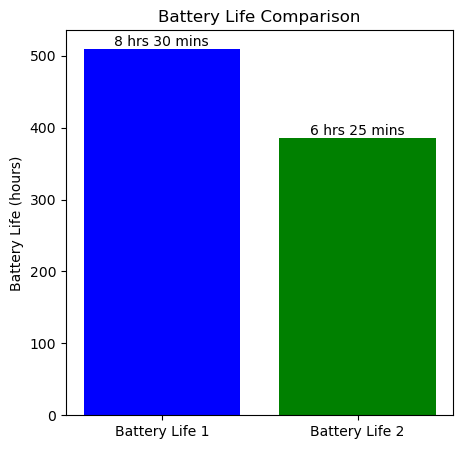

In [7]:

# Battery life data
battery_life_1 = {'hours': 8, 'minutes': 30}
battery_life_2 = {'hours': 6, 'minutes': 25}

# Convert battery life to total minutes
total_minutes_1 = battery_life_1['hours'] * 60 + battery_life_1['minutes']
total_minutes_2 = battery_life_2['hours'] * 60 + battery_life_2['minutes']

# Calculate the difference in minutes
minute_difference = total_minutes_2 - total_minutes_1

# Convert the minute difference to hours and minutes
hour_difference = minute_difference // 60
minute_difference %= 60

# Plotting the bar graph with annotations
labels = ['Battery Life 1', 'Battery Life 2']
values = [total_minutes_1, total_minutes_2]

fig, ax = plt.subplots(figsize=(5, 5))  # Adjust the figure size

bars = plt.bar(labels, values, color=['blue', 'green'])

# Adding annotations for total minutes
for bar, value in zip(bars, values):
    hours = int(value // 60)
    minutes = int(value % 60)
    annotation_text = f'{hours} hrs {minutes} mins'
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, annotation_text, ha='center', va='bottom')

plt.ylabel('Battery Life (hours)')
plt.title('Battery Life Comparison')
plt.show()


In [ ]:
display(base_layout)

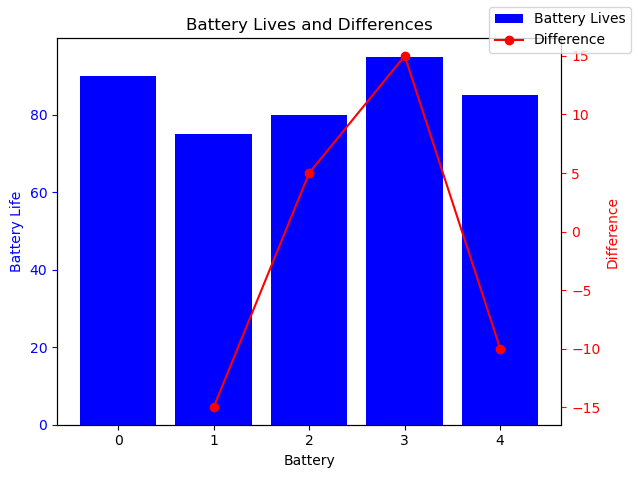

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data (replace this with your actual data)
battery_lives = [90, 75, 80, 95, 85]
differences = np.diff(battery_lives)  # Calculate differences between consecutive battery lives

# Create a figure and axis
fig, ax1 = plt.subplots()

# Bar chart for battery lives
ax1.bar(np.arange(len(battery_lives)), battery_lives, color='blue', label='Battery Lives')
ax1.set_xlabel('Battery')
ax1.set_ylabel('Battery Life', color='blue')
ax1.tick_params('y', colors='blue')

# Line chart for differences
ax2 = ax1.twinx()
ax2.plot(np.arange(1, len(battery_lives)), differences, color='red', marker='o', label='Difference')
ax2.set_ylabel('Difference', color='red')
ax2.tick_params('y', colors='red')

# Title and legend
plt.title('Battery Lives and Differences')
fig.tight_layout()
fig.legend(loc='upper right')

# Show the plot
plt.show()


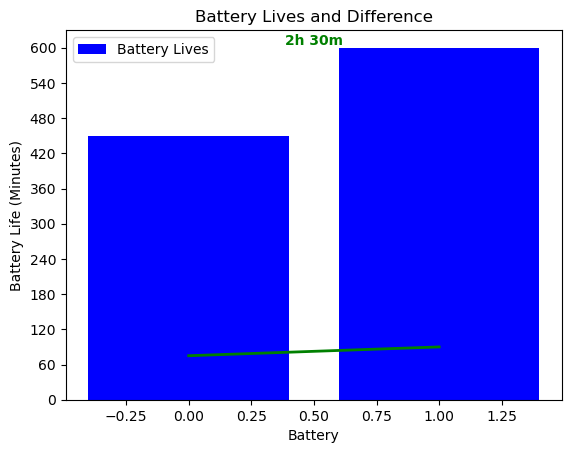

In [40]:
import matplotlib.pyplot as plt

# Sample data (replace this with your actual data)
total_minutes_1 = 450  # Replace with your actual value
total_minutes_2 = 600  # Replace with your actual value

# Calculate the difference in minutes
minute_difference = total_minutes_2 - total_minutes_1

# Convert the minute difference to hours and minutes
hour_difference = minute_difference // 60
minute_difference %= 60

# Create a figure and axis
fig, ax = plt.subplots()

# Bar chart for battery lives
bars = ax.bar([0, 1], [total_minutes_1, total_minutes_2], color='blue', label='Battery Lives')

line_color = 'green' if battery_lives[1] > battery_lives[0] else 'red'
ax.plot([0, 1], battery_lives, color=line_color, linestyle='-', linewidth=2)


# Line connecting the tops of the bars with an arrow
arrow_color = 'green' if total_minutes_2 > total_minutes_1 else 'red'
ax.annotate(f'{hour_difference}h {minute_difference}m', xy=(0.5, max([total_minutes_1, total_minutes_2])),
            ha='center', va='bottom', color=line_color, weight='bold')

# Title and labels
ax.set_title('Battery Lives and Difference')
ax.set_xlabel('Battery')
ax.set_ylabel('Battery Life (Minutes)')

# Set custom y-axis ticks for better visualization
ax.set_yticks(range(0, max([total_minutes_1, total_minutes_2]) + 60, 60))

# Legend
ax.legend()

# Show the plot
plt.show()


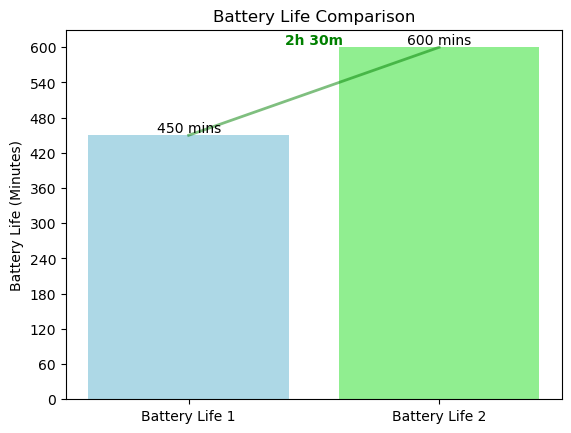

In [67]:
import matplotlib.pyplot as plt

# Sample data (replace this with your actual data)
total_minutes_1 = 450  # Replace with your actual value
total_minutes_2 = 600  # Replace with your actual value

# Calculate the difference in minutes
minute_difference = total_minutes_2 - total_minutes_1

# Convert the minute difference to hours and minutes
hour_difference = minute_difference // 60
minute_difference %= 60

# Create a figure and axis
fig, ax = plt.subplots()

# Bar chart for battery lives with 'sky blue' and 'orange' colors
bars = ax.bar([0, 1], [total_minutes_1, total_minutes_2], color=['lightblue', 'lightgreen'], label='Battery Lives')

# Line connecting the tops of the bars
line_color = 'green' if total_minutes_2 > total_minutes_1 else 'red'
ax.plot([0, 1], [total_minutes_1, total_minutes_2], color=line_color, linestyle='-', linewidth=2, alpha = 0.5)

# Annotate the difference
ax.annotate(f'{hour_difference}h {minute_difference}m', xy=(0.5, max([total_minutes_1, total_minutes_2])),
            ha='center', va='bottom', color=line_color, weight='bold')

for i, value in enumerate([total_minutes_1, total_minutes_2]):
    ax.annotate(f'{value} mins', xy=(i, value), ha='center', va='bottom', color='black')

# Title and labels
ax.set_title('Battery Life Comparison')
ax.set_ylabel('Battery Life (Minutes)')

# Set custom y-axis ticks for better visualization
ax.set_yticks(range(0, max([total_minutes_1, total_minutes_2]) + 60, 60))

# Set custom x-axis ticks and labels
ax.set_xticks([0, 1])
ax.set_xticklabels(['Battery Life 1', 'Battery Life 2'])


# Show the plot
plt.show()


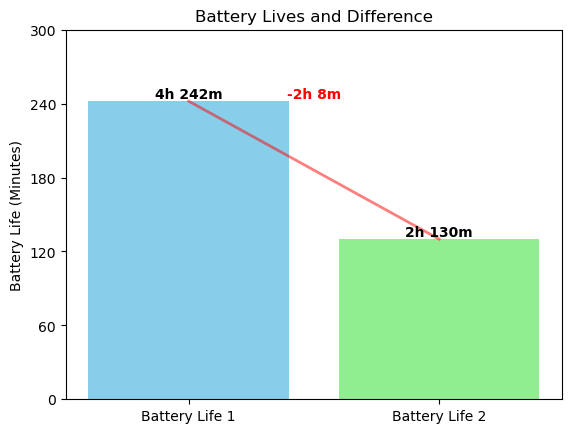

In [69]:
import matplotlib.pyplot as plt

# Sample data (replace this with your actual data)
total_hours_1, total_minutes_1 = 4, 2  # Replace with your actual values
total_hours_2, total_minutes_2 = 2, 10  # Replace with your actual values

# Calculate the total minutes for each battery life
total_minutes_1 = total_hours_1 * 60 + total_minutes_1
total_minutes_2 = total_hours_2 * 60 + total_minutes_2

# Calculate the difference in minutes
minute_difference = total_minutes_2 - total_minutes_1

# Convert the minute difference to hours and minutes
hour_difference = minute_difference // 60
minute_difference %= 60

# Create a figure and axis
fig, ax = plt.subplots()

# Bar chart for battery lives with 'sky blue' and 'orange' colors
bars = ax.bar([0, 1], [total_minutes_1, total_minutes_2], color=['skyblue', 'lightgreen'], label='Battery Lives')

# Line connecting the tops of the bars with reduced opacity
line_color = 'green' if total_minutes_2 > total_minutes_1 else 'red'
ax.plot([0, 1], [total_minutes_1, total_minutes_2], color=line_color, linestyle='-', linewidth=2, alpha=0.5)

# Annotate the difference
ax.annotate(f'{hour_difference}h {minute_difference}m', xy=(0.5, max([total_minutes_1, total_minutes_2])),
            ha='center', va='bottom', color=line_color, weight='bold')

# Annotate battery lives in hours and minutes
for i, value in enumerate([(total_hours_1, total_minutes_1), (total_hours_2, total_minutes_2)]):
    ax.annotate(f'{value[0]}h {value[1]}m', xy=(i, total_minutes_1 if i == 0 else total_minutes_2),
                ha='center', va='bottom', color='black', weight='bold')

# Title and labels
ax.set_title('Battery Lives and Difference')
ax.set_ylabel('Battery Life (Minutes)')

# Set custom y-axis ticks for better visualization
ax.set_yticks(range(0, max([total_minutes_1, total_minutes_2]) + 60, 60))

# Set custom x-axis ticks and labels
ax.set_xticks([0, 1])
ax.set_xticklabels(['Battery Life 1', 'Battery Life 2'])

# Show the plot
plt.show()


In [77]:
import pandas
pandas.__version__

'1.5.3'